<a href="https://colab.research.google.com/github/Harsh-Singh24/ML-Model-Linear-Regression/blob/main/LinearRregression_Bikedemandprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing demand prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Project by  -**    Harsh Singh

# **Project Summary -**

In this project we are dealing with seoul bike sharing dataset and we will try to find a machine learning algorithm for prediction of demand of Rental bikes.

We will also try find features which affect most on the prediction.The workflow of this project is divided into following steps.

Step 1 : EDA(Exploratory data analysis)

Step 2 : Feature Engineering.

 Step 3 : Feature Selection.

  Step 4 : Model Creation.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

import numpy as np
from numpy import math
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science : Project /ML Project : Linear Regression : Bike demand prediction/SeoulBikeData.csv')

### Dataset First View

In [6]:
# Dataset First Look
pd.set_option('display.max_columns', None)
dataset

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

Dataset have 14 features(columns) and 8760 Observations (rows)

### Dataset Information

In [8]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

above data set has no duplicate values

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
dataset.isnull().sum().sum()

0

Simillarly above dataset have zero null values

### What did you know about your dataset?

Uptill now we found that our dataset have 8760 rows and 14 columns. Clearly above data do not have any null/missing values and also do not consist any duplicate values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
dataset.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

1. Dependent Variable

Rented Bike Count : Number of rented bikes per hour which is our dependent variable and we need to predict that

2. Independent Variable#

Hour: The hour of the day, starting from 0-23 it's in a digital time format

Temperature(°C): Temperature in Celsius

Humidity(%): Humidity in the air in %

Wind speed (m/s) : Speed of the wind in m/s

Visibility (10m): Visibility in m

Dew point temperature(°C): Temperature at the beggining of the day

Solar Radiation (MJ/m2): Sun contribution

Rainfall(mm): Amount of raining in mm

Snowfall (cm): Amount of snowing in cm

Seasons: Season of the year, there are only 4 season's in data .

Holiday: If the day is holiday period or not

Functioning Day: If the day is a Functioning Day or not

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f'The Number of unique values in feature {i} are {dataset[i].nunique()}')

The Number of unique values in feature Date are 365
The Number of unique values in feature Rented Bike Count are 2166
The Number of unique values in feature Hour are 24
The Number of unique values in feature Temperature(°C) are 546
The Number of unique values in feature Humidity(%) are 90
The Number of unique values in feature Wind speed (m/s) are 65
The Number of unique values in feature Visibility (10m) are 1789
The Number of unique values in feature Dew point temperature(°C) are 556
The Number of unique values in feature Solar Radiation (MJ/m2) are 345
The Number of unique values in feature Rainfall(mm) are 61
The Number of unique values in feature Snowfall (cm) are 51
The Number of unique values in feature Seasons are 4
The Number of unique values in feature Holiday are 2
The Number of unique values in feature Functioning Day are 2


## 3. ***Data Wrangling***

### Functions

In [14]:
def col(dataset):
  return dataset.columns.to_list()

In [15]:
def IQR(data,col):
  I = np.percentile(data[col],75) - np.percentile(data[col],25)
  return I

def upper_limit(data,col):
  iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
  ul = np.percentile(data[col],75) + (1.5 * iqr)
  return ul

def lower_limit(data,col):
  iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
  ll = np.percentile(data[col],25) - (1.5 * iqr)
  return ll

In [16]:
#function for One hot encoding
def one_hot_encoding (data,column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

### Data Wrangling Code

In [17]:
#Categorising railfall into categoties i.e 1. Light rain 2. Moderate rain 3. Heavy rain
dataset['Rainfall_cat'] = dataset['Rainfall(mm)'].apply(lambda x : 'Light' if x <= 2.5  else ('moderate' if x >2.5 and x <= 5 else 'high'))

In [18]:
#converting Date column into datetime datatype
dataset['Date'] = pd.to_datetime(dataset['Date'], format = '%d/%m/%Y')

In [19]:
#creating a new column Hour cat containing three categories of hour i.e from Peak_hour, Rest_hour and Normal_hour
dataset['Hour_cat'] = dataset['Hour'].apply(lambda x : 'Peak_hour' if x == 8 or (x >=16 and x<=22) else ('Rest_hour' if x>=1  and x <= 6 else 'Normal_hour'))

In [20]:
#creating two columns with name month and day(name of the weekdays)
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

In [21]:
dataset['Weekday/weekend'] = dataset['day'].apply(lambda x : 'Weekend' if (x=='Saturday' or x=='Sunday') else 'Weekday')

In [22]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rainfall_cat', 'Hour_cat', 'month',
       'day', 'Weekday/weekend'],
      dtype='object')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [24]:
#assigning 0 for no holiday and 1 for holiday in Holiday feature
dataset['Holiday'].replace({'No Holiday':0,'Holiday':1},inplace = True)

In [25]:
#assigning 0 for no and 1 for yes in Functioning Day feature
dataset['Functioning Day'].replace({'No':0,'Yes':1},inplace = True)

In [26]:
#creating a new column snowfall cat containing three categories of hour i.e 1. Light snowfall 2. Moderate snowfall 3. Heavy snowfall
dataset['snowfall_cat'] = dataset['Snowfall (cm)'].apply(lambda x : 'Heavy_snowfall' if x  > 4  else ('Light_snowfal' if x>=0 and x < 2 else 'Normal_snowfall'))

### What all manipulations have you done and insights you found?

1. Created a new column Rainfall_cat for categorising the rainfall intesity and then to rainfall intensity effect on rent demand. after checking correlation we got to understant that effect of rainfall intesity on demand has very less significance.

2. Feature date is converted into date_time type.

3. Created a new column with name, hour category in this column we categorize our into three category i.e Peak_hour, Normal_hour and Rest_hour.

4. Created a new clonmn Weekday_weekend indicating day belongs to working day or weekend.

5. For column Holiday and Functioning Day assigned 0 for no and 1 for yes, so readability increases.

6. Created a new column for snowfall category to check the effect of snowfall in demand.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In this project we are trying to build a ML regression model to predict the demand of rental bikes.

#### Chart - 1 Understanding our dependent variable, Rented Bike Count

In [27]:
print(dataset['Date'].min())
print(dataset['Date'].max())

2017-12-01 00:00:00
2018-11-30 00:00:00


In [28]:
plt.rcParams['figure.figsize'] = (5,5)

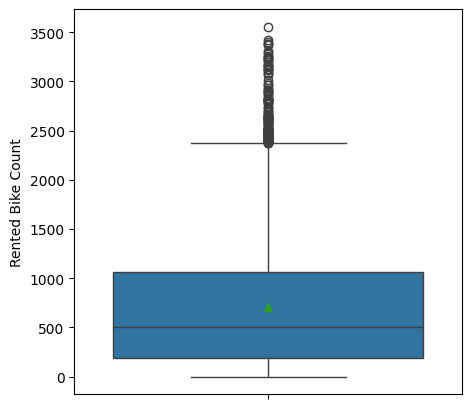

In [29]:
# Chart - 1 visualization code
sns.boxplot(y=dataset['Rented Bike Count'],showmeans = True)
plt.show()

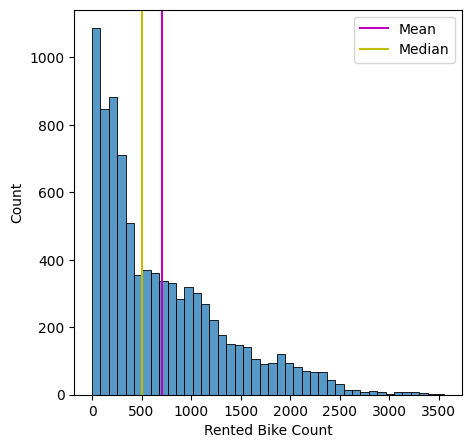

In [30]:
sns.histplot(x= dataset['Rented Bike Count'])
plt.axvline(dataset['Rented Bike Count'].mean(),color= 'm', label = 'Mean')
plt.axvline(dataset['Rented Bike Count'].median(),color= 'y', label = 'Median')
plt.legend(loc = 'upper right')
plt.show()

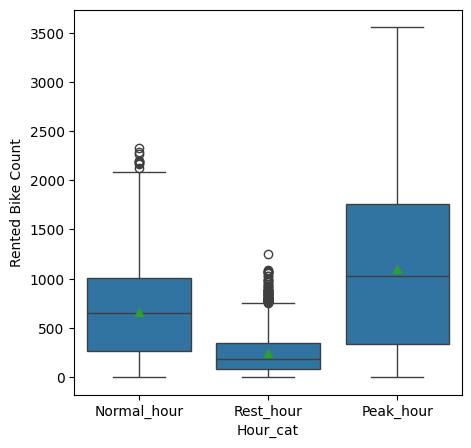

In [31]:
sns.boxplot(x=dataset['Hour_cat'], y=dataset['Rented Bike Count'],showmeans = True)
plt.show()

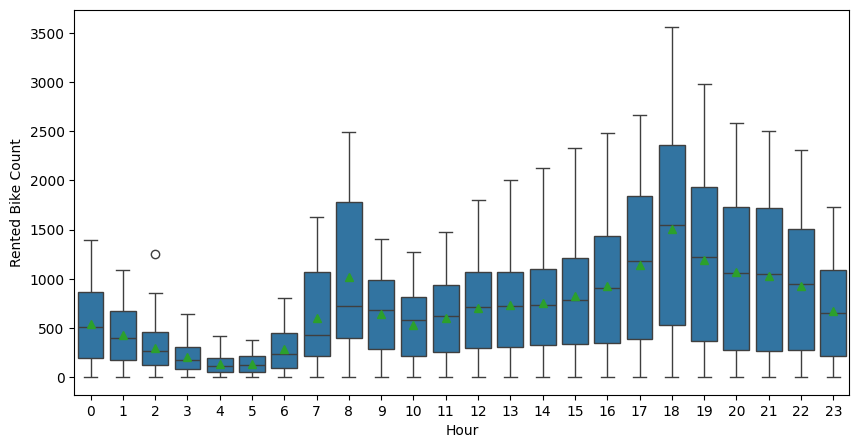

In [32]:
plt.rcParams['figure.figsize'] = (10,5)
sns.boxplot(x=dataset['Hour'], y=dataset['Rented Bike Count'],showmeans = True)
plt.show()

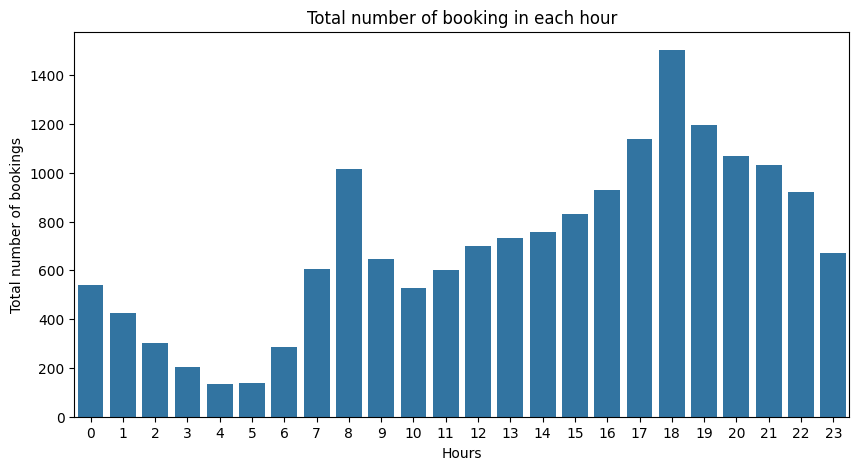

In [33]:
#np.array(dataset.groupby(['Hour'])['Rented Bike Count'].sum())
sns.barplot(x= dataset.Hour.unique(), y = np.array(dataset.groupby(['Hour'])['Rented Bike Count'].mean()))
plt.title('Total number of booking in each hour')
plt.xlabel('Hours')
plt.ylabel('Total number of bookings')
plt.show()

##### 1. Why did you pick the specific chart?

When data is numerical, Histogram is used to check the distrubtion of the data. Similarly bar plot is also used to check the distribution of our numerical data. It also represnt the IQR( 75th percentile, 25th percentile with median and mean), Min value(Q1-1.5*IQR,non-outlier) and Max value(Q3+1.5*IQR,non-outlier).

##### 2. What is/are the insight(s) found from the chart?

From above histogram we can see the mean and median are around 750 and 500. We also see from box plot that max demand is around 2500 and above that are outliers.

As we describe the data using hours of booking our result changes dramatically.
now we can only see one outlier in our data. This shows demands is highly depending upon hour.

#### Chart - 2 Temprature with Rented Bike Count

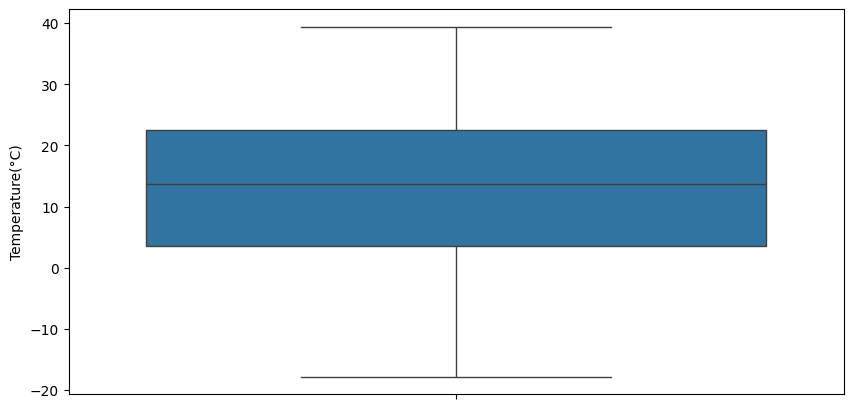

In [34]:
sns.boxplot(dataset['Temperature(°C)'])
plt.show()

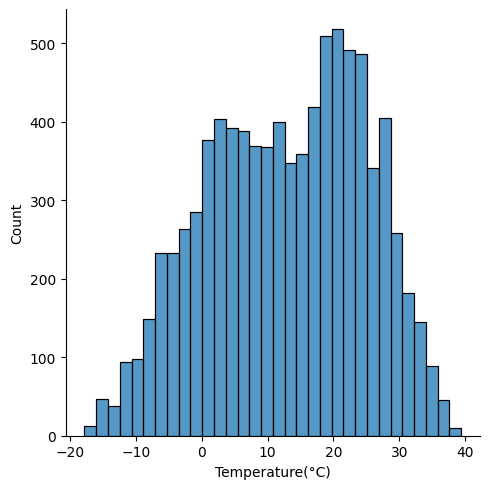

In [35]:
sns.displot(dataset['Temperature(°C)'])
plt.show()

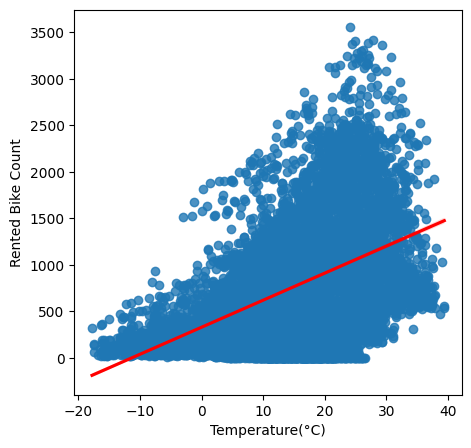

In [36]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize'] = (5,5)
sns.regplot(x = dataset['Temperature(°C)'],y = dataset['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

In [37]:
corr_chart2 = dataset['Temperature(°C)'].corr(dataset['Rented Bike Count'])
print(corr_chart2)

0.5385581530139789


##### 1. Why did you pick the specific chart?

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart as the temprature increase the booking count is also increasing. Both the features are moderatley correlated with each other with pearson correlation coefficient of 0.53

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

At high temprature demand will be more so business can increase the availability of bikes as well as can increase the rental price to increase profit.

#### Chart - 3 Dew Point templrature with Rented Bike count.

Dew Point temprature increases moisture increases which leads to less comfort

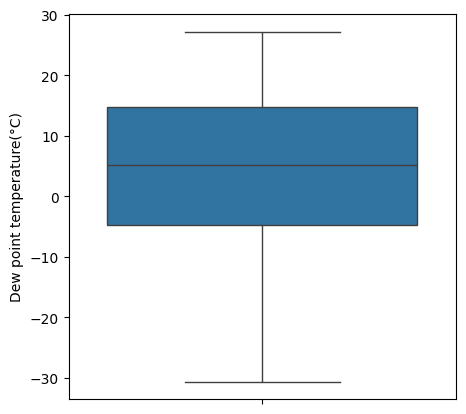

In [38]:
sns.boxplot(dataset['Dew point temperature(°C)'])
plt.show()

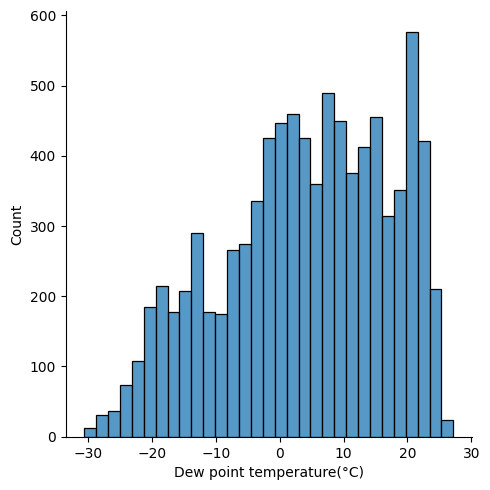

In [39]:
# Chart - 3 visualization code

sns.displot(dataset['Dew point temperature(°C)'])
plt.show()

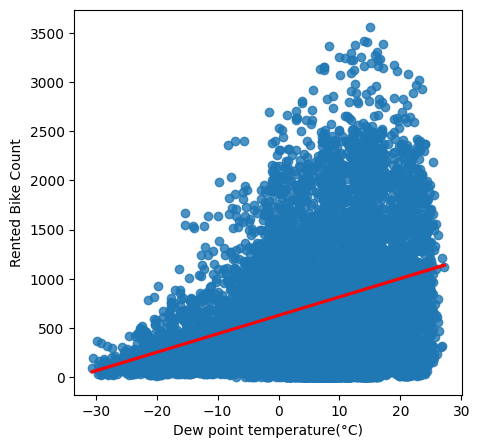

In [40]:
sns.regplot(x = dataset['Dew point temperature(°C)'],y = dataset['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

In [41]:
corr_chart3 = dataset['Dew point temperature(°C)'].corr(dataset['Rented Bike Count'])
print(corr_chart3)

0.37978812124497235


In [42]:
corr_chart3A = dataset['Temperature(°C)'].corr(dataset['Dew point temperature(°C)'])
print(corr_chart3A)

0.9127982187579919


##### 1. Why did you pick the specific chart?

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart as the Dew point temperature increase the booking count is also increasing. Both the features are moderatley correlated with each other with pearson correlation coefficient of 0.379. The correlation exists but it is irrelatively small.

Also, We checked the correlation between temperature and Dew point temperature.
and these variables are highly correlated so we can use one them in our ML algo but temprature shows relatively high correlation with bookings so it is advisable to use temprature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

At high Dew point temperature demand will be more so business can increase the availability of bikes as well as can increase the rental price to increase profit.

#### Chart - 4 Rainfall with Rented Bike Count

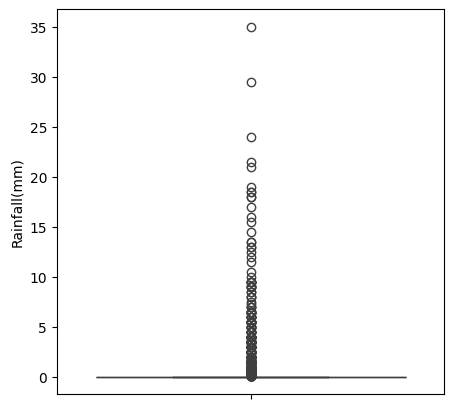

In [43]:
sns.boxplot(dataset['Rainfall(mm)'])
plt.show()

In [44]:
dataset['Rainfall(mm)'].describe(include = 'all')

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

In [45]:
print('90th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],90))
print('92.5th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],92.5))
print('95th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],95))
print('97.5th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],97.5))
print('99th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],99))

90th perncetile of Rainfall is :  0.0
92.5th perncetile of Rainfall is :  0.0
95th perncetile of Rainfall is :  0.4
97.5th perncetile of Rainfall is :  1.5
99th perncetile of Rainfall is :  4.0


In [46]:
dataset[dataset['Rainfall(mm)'] > 4.0].shape

(79, 20)

Only 79 observation where rainfall is more than 4mm/Hr

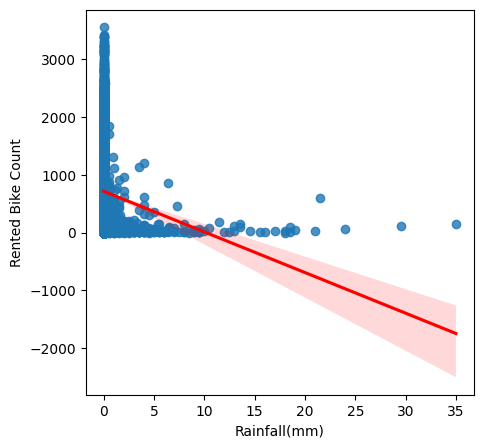

In [47]:
# Chart - 4 visualization code
sns.regplot(x = dataset['Rainfall(mm)'],y = dataset['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

In [48]:
corr_chart4 = dataset['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
print(corr_chart4)

-0.12307395980285019


In [49]:
dataset['Rainfall_cat'].value_counts()

Light       8633
high          66
moderate      61
Name: Rainfall_cat, dtype: int64

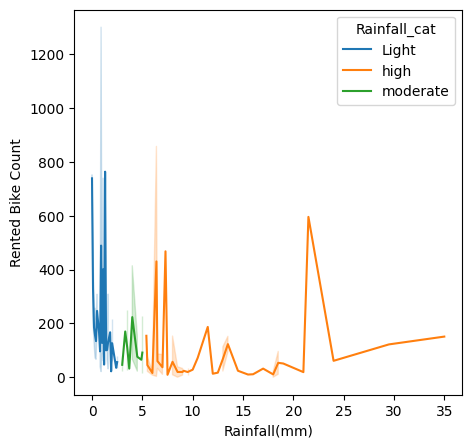

In [50]:
sns.lineplot(x = dataset['Rainfall(mm)'], y = dataset['Rented Bike Count'],hue = dataset['Rainfall_cat'])
plt.show()

In [51]:
corr_chart4a = dataset[dataset['Rainfall_cat']=='high']['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4a

0.10047789060798162

In [52]:
corr_chart4b = dataset[dataset['Rainfall_cat']=='moderate']['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4b

0.08027795963361832

In [53]:
corr_chart4c = dataset[dataset['Rainfall_cat']=='Light']['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4c

-0.15657724641518353

##### 1. Why did you pick the specific chart?

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart as the Rainfall increases the booking count  decreases. Both the features are have low correlation with each other with pearson correlation coefficient of -0.123. we can ignore this feature from our machine learning model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Rainfall has no significant effect on demand

#### Chart - 5 Hours With Rented Bike Count

In [54]:
y_chart5 = list(dataset.groupby(dataset['Hour'])['Rented Bike Count'].sum())
x_chart5 = list(dataset.groupby(dataset['Hour'])['Rented Bike Count'].sum().index)

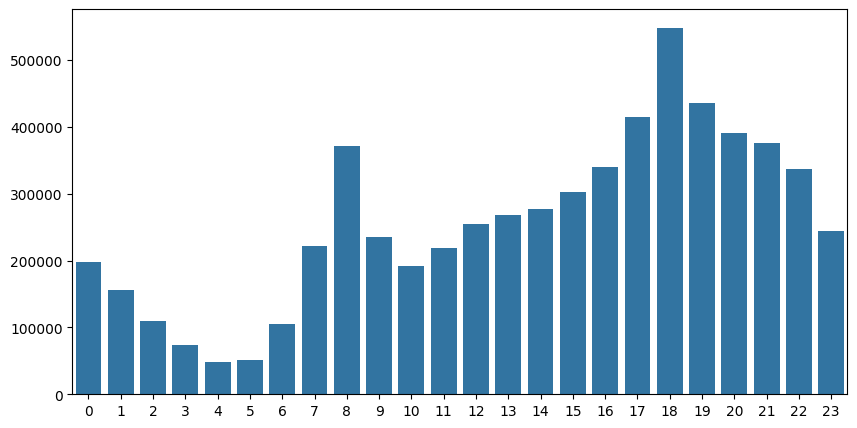

In [55]:
# Chart - 5 visualization code
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(x= x_chart5,y = y_chart5)
plt.show()

In [56]:
dataset.groupby(dataset['Hour_cat'])['Rented Bike Count'].mean()

Hour_cat
Normal_hour     661.394795
Peak_hour      1100.764726
Rest_hour       248.397260
Name: Rented Bike Count, dtype: float64

In [57]:
y_chart5a = list(dataset.groupby(dataset['Hour_cat'])['Rented Bike Count'].mean())
x_chart5a = list(dataset.groupby(dataset['Hour_cat'])['Rented Bike Count'].mean().index)

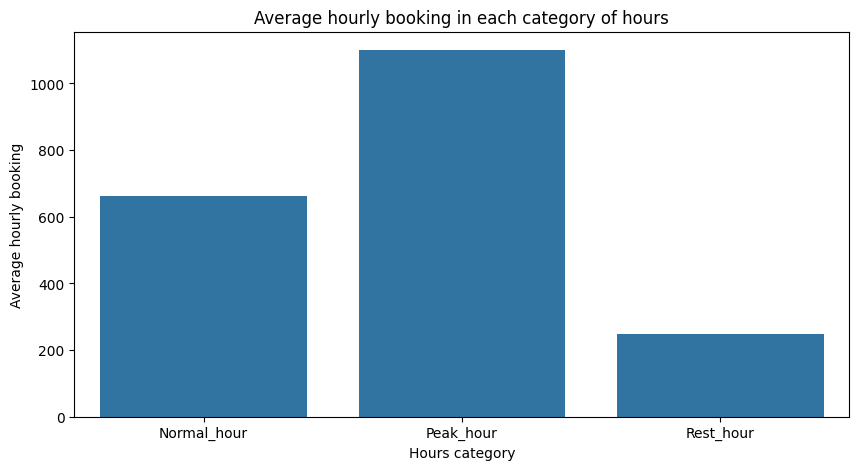

In [58]:
sns.barplot(x = x_chart5a,y = y_chart5a)
plt.title('Average hourly booking in each category of hours')
plt.xlabel('Hours category')
plt.ylabel('Average hourly booking')
plt.show()

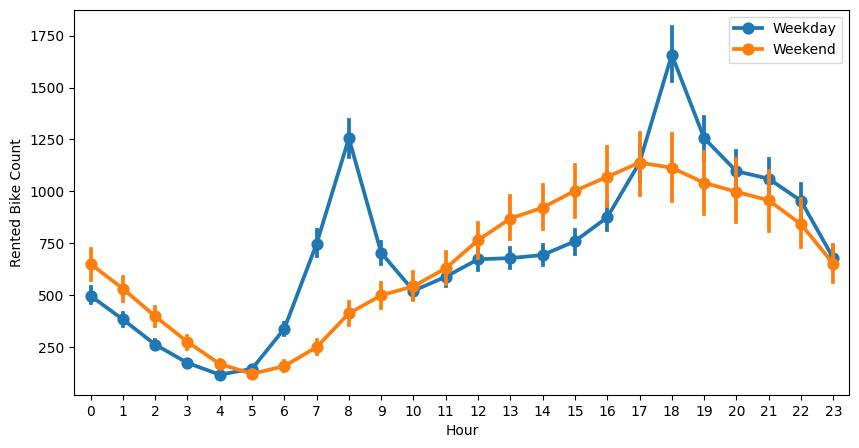

In [59]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Weekday/weekend')
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare

##### 2. What is/are the insight(s) found from the chart?

from our chart we can see that during specific hours of the demand is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 During peak hours, Business can increase the rent price to generate more revanue And also can increase the availibilty of rented bikes.

#### Chart - 6 Rented Bike Count with Holidays

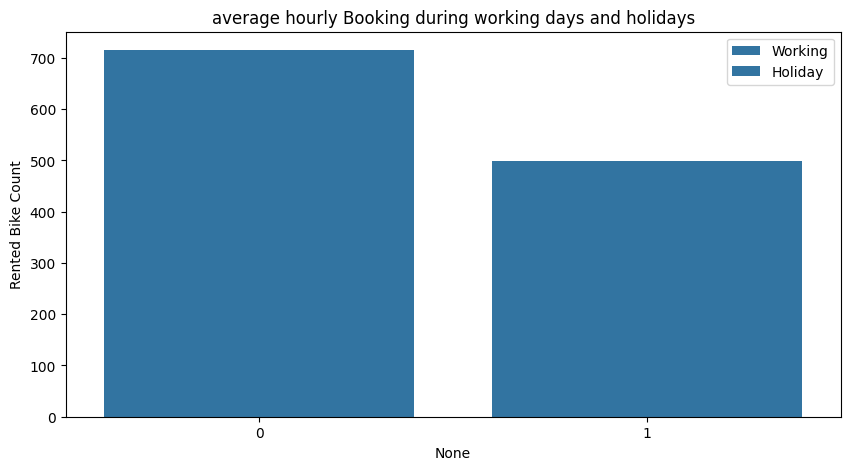

In [60]:
# Chart - 6 visualization code
sns.barplot(x = dataset['Holiday'].value_counts(sort = True ).index, y = dataset.groupby('Holiday')['Rented Bike Count'].mean(),  label = ['Working','Holiday'])
plt.legend(loc = 'upper right')
plt.title('average hourly Booking during working days and holidays')
plt.show()

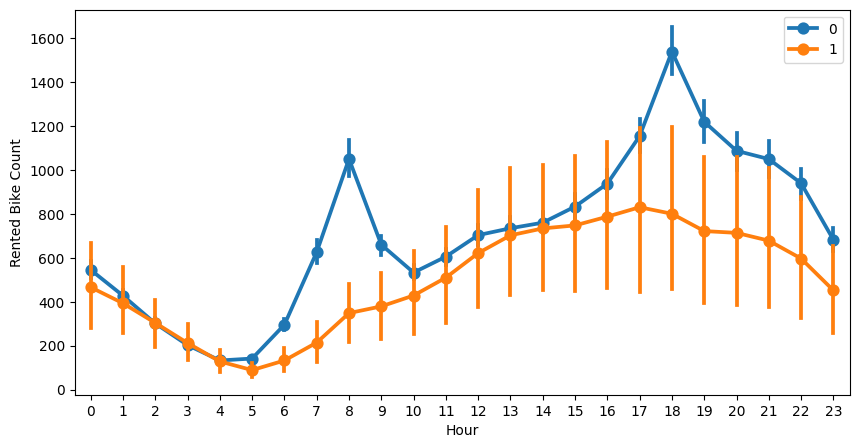

In [61]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Holiday',)
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

From above charts we can see that average hourly booking is more during working days than holidays. We can also see that distribution also changes during holidays  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Demands during peak hours reduced significantly on holidays.

#### Chart - 7 Rented Bike Count with Functional days

In [62]:
dataset[(dataset['Functioning Day'] == 0) & (dataset['Rented Bike Count'] > 0)]['Functioning Day'].count()

0

In [63]:
y7 = dataset.groupby('Functioning Day')['Rented Bike Count'].mean( ).to_list()
y7

[0.0, 729.1569994093326]

In [64]:
x7 = [0,1]
x7

[0, 1]

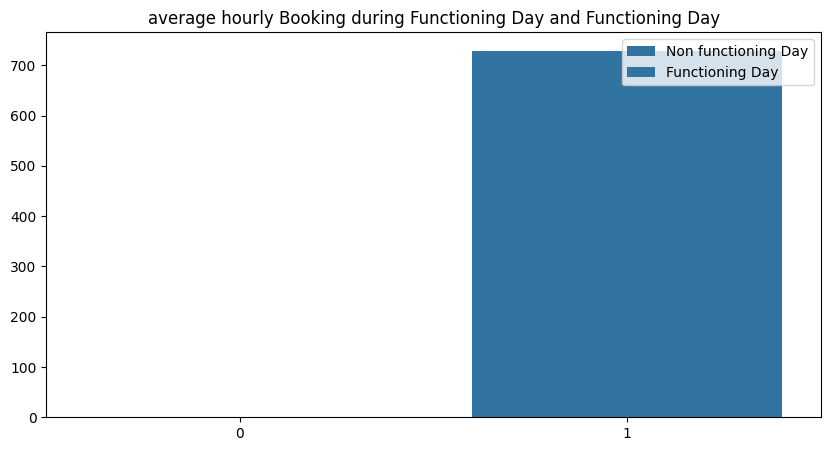

In [65]:
# Chart - 7 visualization code
sns.barplot(x = x7, y = y7, label = ['Non functioning Day','Functioning Day'])
plt.legend(loc = 'upper right')
plt.title('average hourly Booking during Functioning Day and Functioning Day')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

##### 2. What is/are the insight(s) found from the chart?

On Non functional day, No bookings were made which is obvious

#### Chart - 8 Rented Bike Count with Seasons and Months

In [66]:
col(dataset)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Rainfall_cat',
 'Hour_cat',
 'month',
 'day',
 'Weekday/weekend',
 'snowfall_cat']

In [67]:
x8 = dataset.groupby(['Seasons'])['Rented Bike Count'].mean().index
x8

Index(['Autumn', 'Spring', 'Summer', 'Winter'], dtype='object', name='Seasons')

In [68]:
y8 = dataset.groupby(['Seasons'])['Rented Bike Count'].mean().to_list()
y8

[819.5979853479854, 730.03125, 1034.0733695652175, 225.5412037037037]

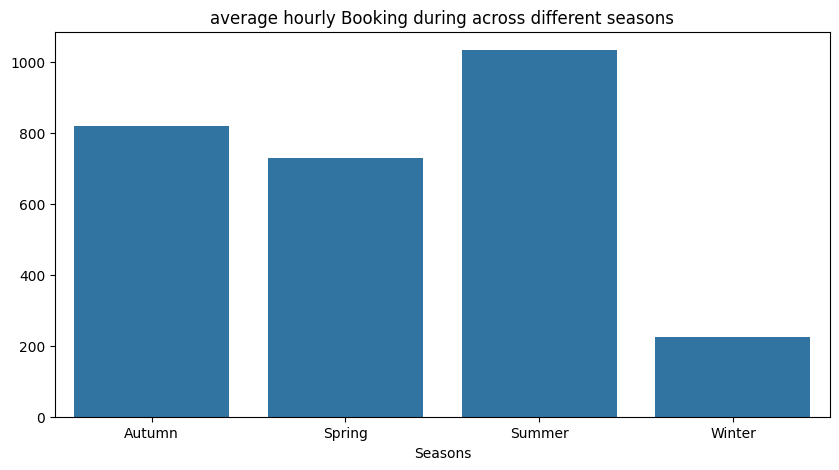

In [69]:
# Chart - 8 visualization code
sns.barplot(x = x8, y = y8)
plt.title('average hourly Booking during across different seasons')
plt.show()

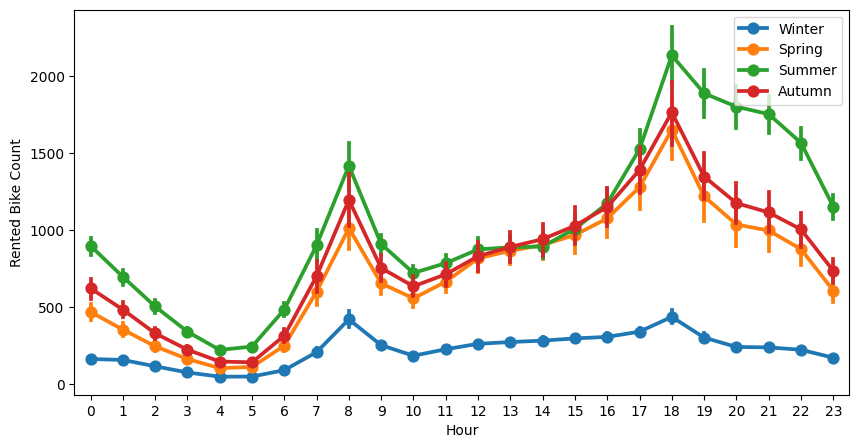

In [70]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Seasons')
plt.legend(loc = 'upper right')
plt.show()

In [71]:
dataset.groupby(['month'])['Rented Bike Count'].mean()

month
1      201.620968
2      225.941964
3      511.551075
4      728.093056
5      950.387097
6     1245.676389
7      987.177419
8      876.192204
9      935.572222
10     874.563172
11     646.826389
12     249.099462
Name: Rented Bike Count, dtype: float64

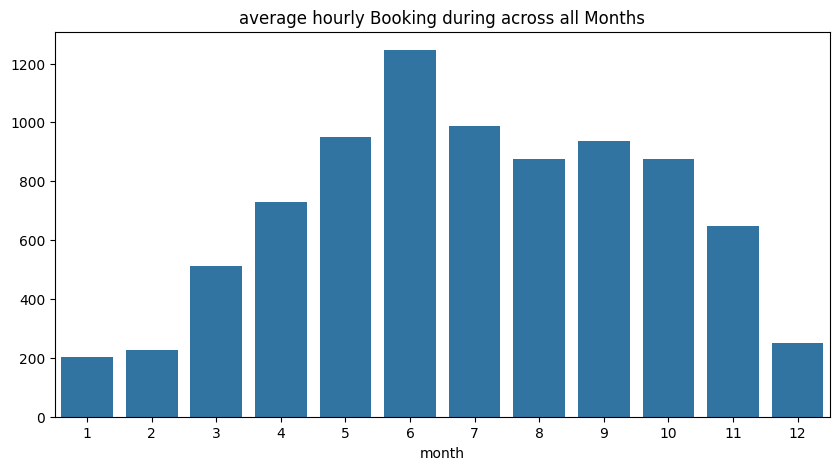

In [72]:
sns.barplot(x = dataset.groupby(['month'])['Rented Bike Count'].mean().index, y = dataset.groupby(['month'])['Rented Bike Count'].mean().to_list())
plt.title('average hourly Booking during across all Months')
plt.show()

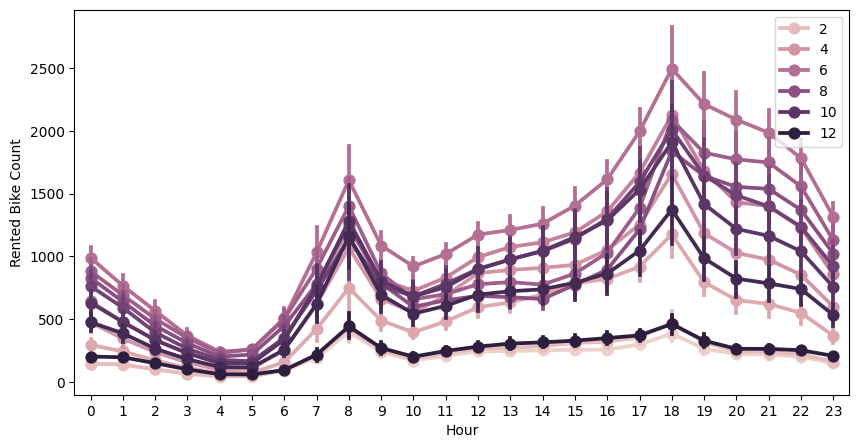

In [73]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='month')
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

least booking are observed in winter season where as most bookings are occurend in summers. Distribution of bookings with respect to Hours are same for 'Autumn', 'Spring', 'Summer' and slightly different for 'Winters'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Availability should be more in summer season and during winters few bikes can be used for different purpose to optimize the profit.

#### Chart - 9 Rented Bike Count with Snowfall

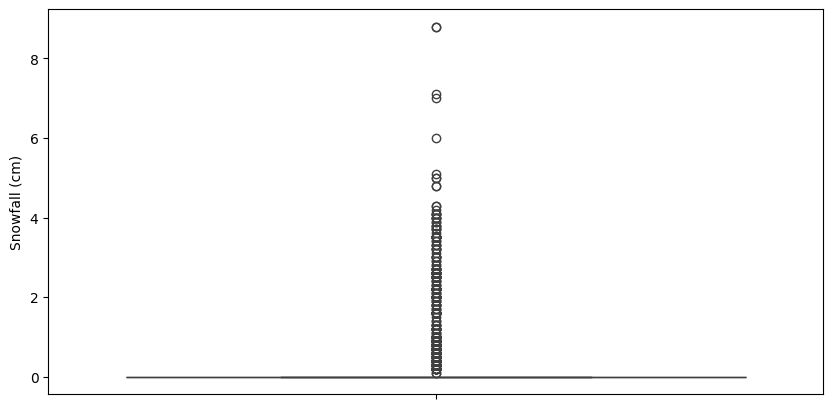

In [74]:
sns.boxplot(dataset['Snowfall (cm)'])
plt.show()

In [75]:
print('90th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],90))
print('92.5th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],92.5))
print('95th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],95))
print('97.5th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],97.5))
print('99th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],99))

90th perncetile of Snowfall is :  0.0
92.5th perncetile of Snowfall is :  0.0
95th perncetile of Snowfall is :  0.2
97.5th perncetile of Snowfall is :  1.0
99th perncetile of Snowfall is :  2.5


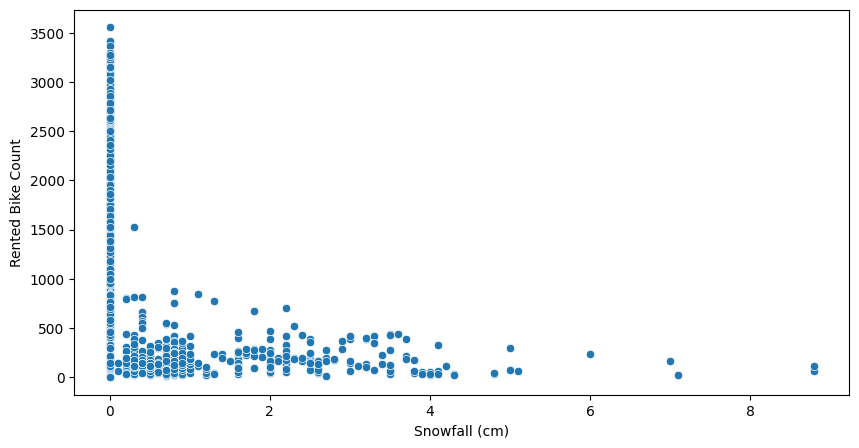

In [76]:
# Chart - 9 visualization code
sns.scatterplot(data = dataset, x = 'Snowfall (cm)', y = 'Rented Bike Count')
plt.show()

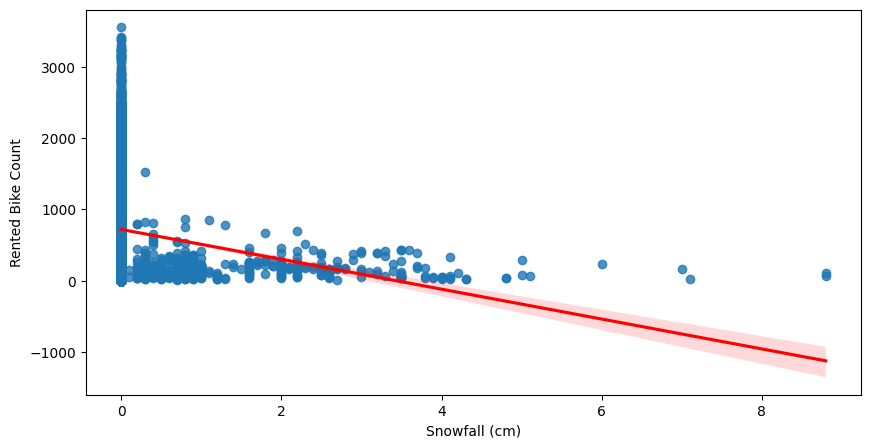

In [77]:
sns.regplot(data = dataset, x = 'Snowfall (cm)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [78]:
corr_snowfall_demand = dataset['Snowfall (cm)'].corr(dataset['Rented Bike Count'])
print(corr_snowfall_demand)

-0.1418036499974599


In [79]:
dataset.groupby('snowfall_cat')['Rented Bike Count'].mean()

snowfall_cat
Heavy_snowfall     102.882353
Light_snowfal      713.212297
Normal_snowfall    184.349593
Name: Rented Bike Count, dtype: float64

In [80]:
x9 = x = dataset.groupby('snowfall_cat')['Rented Bike Count'].mean().index.to_list()
x9

['Heavy_snowfall', 'Light_snowfal', 'Normal_snowfall']

In [81]:
y9 = dataset.groupby('snowfall_cat')['Rented Bike Count'].mean().to_list()
y9

[102.88235294117646, 713.2122969837587, 184.34959349593495]

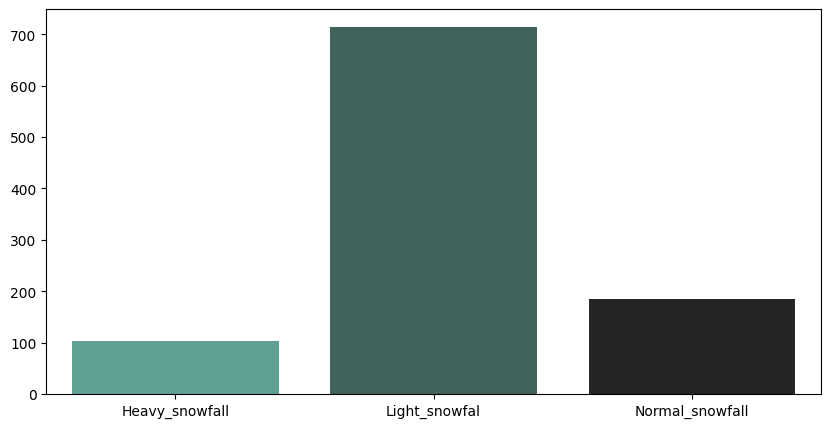

In [82]:
sns.barplot(x = x9, y = y9, palette = 'dark:#5A9_r')
plt.show()

In [83]:
dataset[dataset['Seasons'] == 'Winter'].groupby('snowfall_cat')['snowfall_cat'].value_counts()

snowfall_cat     snowfall_cat   
Heavy_snowfall   Heavy_snowfall       10
Light_snowfal    Light_snowfal      2049
Normal_snowfall  Normal_snowfall     101
Name: snowfall_cat, dtype: int64

In [84]:
dataset[dataset['Seasons'] == 'Summer'].groupby('snowfall_cat')['snowfall_cat'].value_counts()

snowfall_cat   snowfall_cat 
Light_snowfal  Light_snowfal    2208
Name: snowfall_cat, dtype: int64

In [85]:
dataset.groupby('snowfall_cat')['snowfall_cat'].value_counts()

snowfall_cat     snowfall_cat   
Heavy_snowfall   Heavy_snowfall       17
Light_snowfal    Light_snowfal      8620
Normal_snowfall  Normal_snowfall     123
Name: snowfall_cat, dtype: int64

For Heavy Rainfall samplesize in not sufficient

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

Bar plot is also used to check the distribution of our numerical data.



##### 2. What is/are the insight(s) found from the chart?

From regression plot we can analyse that with increase of snowfall , demand decreases but it also shows that when snowfall is more than 4cm the demand becomes negative which is not the possible.

to counter this created a new column with snowfall category and bar chart is ploted over it. this column with one-hot encoding can be used  in our ML model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With increase of snowfall, Demand decreases so business can use bikes for different purpose.

#### Chart - 10 Rented Bike Count with Humidity

In [86]:
col(dataset)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Rainfall_cat',
 'Hour_cat',
 'month',
 'day',
 'Weekday/weekend',
 'snowfall_cat']

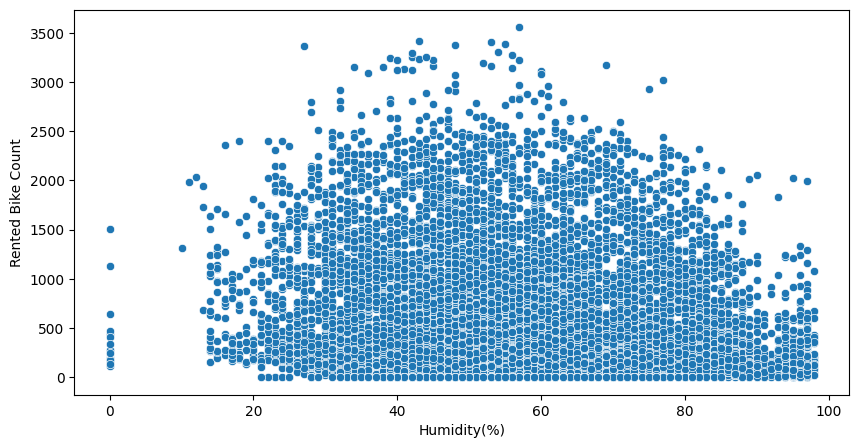

In [87]:
# Chart - 10 visualization code
sns.scatterplot(data = dataset, x = 'Humidity(%)', y = 'Rented Bike Count')
plt.show()

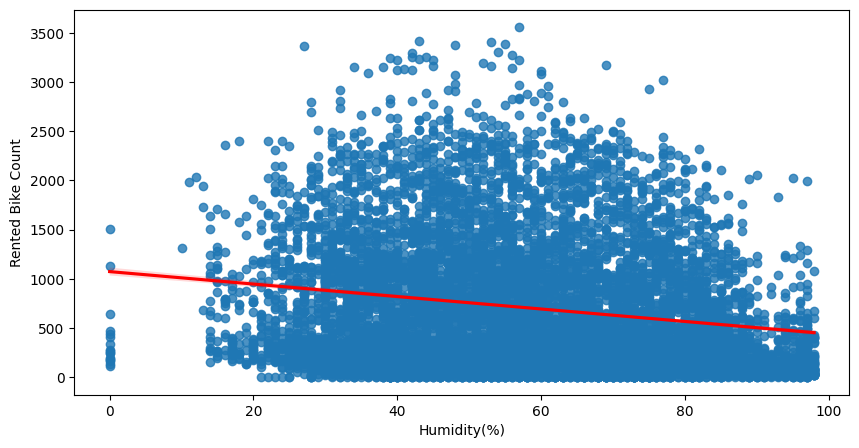

In [88]:
sns.regplot(data = dataset, x = 'Humidity(%)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [89]:
corr_Humidity_demand = dataset['Humidity(%)'].corr(dataset['Rented Bike Count'])
print(corr_Humidity_demand)

-0.19978016700089823


##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Humidity is negatively correlated with Demand with the correlation coeficeint of -0.2 indicating no significant linear relationship between demand and Humidiity

#### Chart - 11 Rented Bike Count with Windspeed.

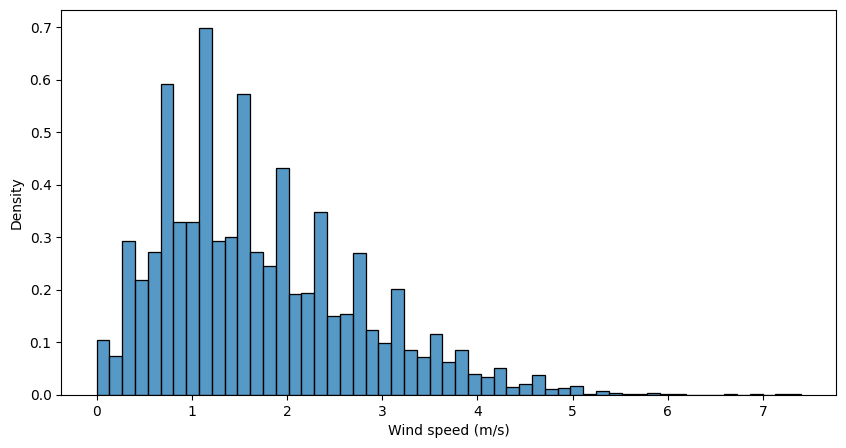

In [90]:
# Chart - 11 visualization code
sns.histplot(x= dataset['Wind speed (m/s)'],stat='density')
plt.show()

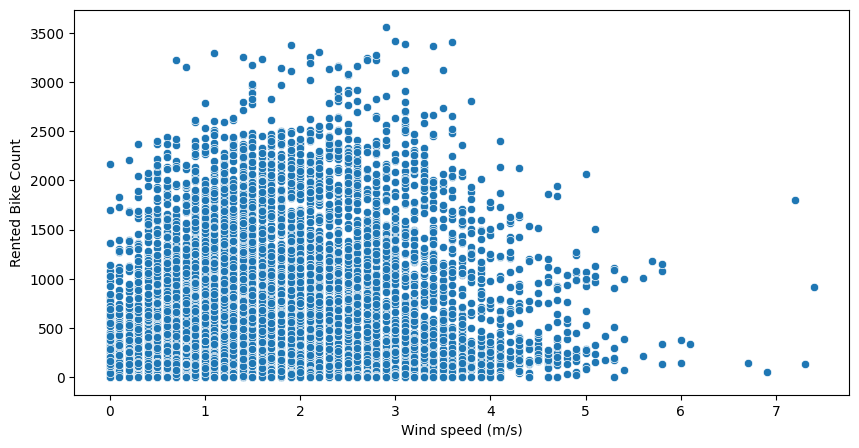

In [91]:
sns.scatterplot(data = dataset, x = 'Wind speed (m/s)', y = 'Rented Bike Count')
plt.show()

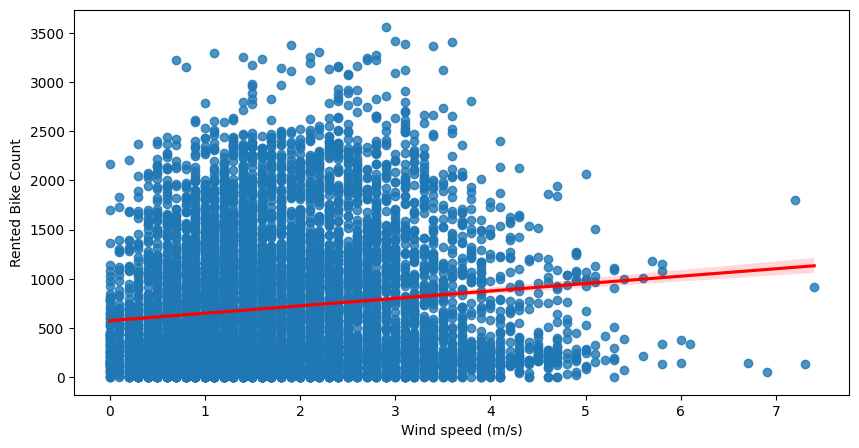

In [92]:
sns.regplot(data = dataset, x = 'Wind speed (m/s)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [93]:
corr_wind_demand = dataset['Wind speed (m/s)'].corr(dataset['Rented Bike Count'])
print(corr_wind_demand)

0.12110844818838669


In [94]:
dataset['Wind speed (m/s)'].mean()

1.7249086757990868

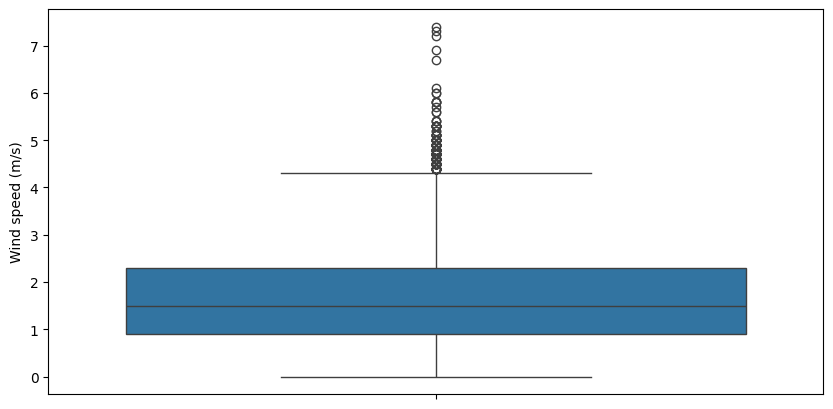

In [95]:
sns.boxplot(dataset['Wind speed (m/s)'])
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that windspeed is correlated with Demand with the correlation coeficeint of +.12 indicating no significant linear relationship between demand and windspeed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No significant relationship between demand and windspeed.

#### Chart - 12 Rented Bike Count with Visibility.

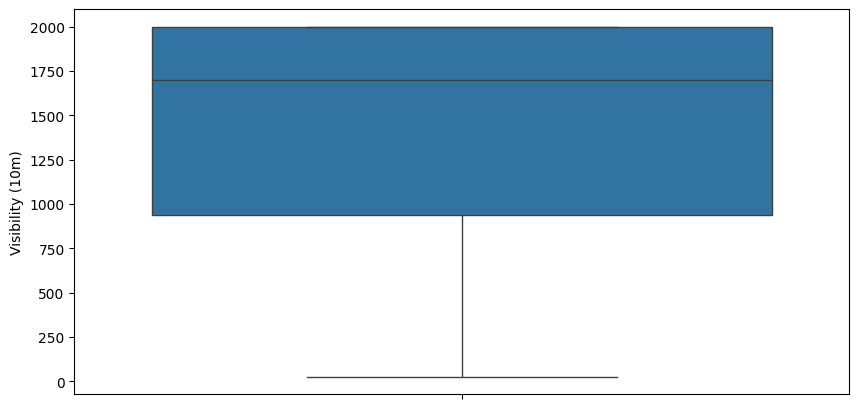

In [96]:
sns.boxplot(dataset['Visibility (10m)'])
plt.show()

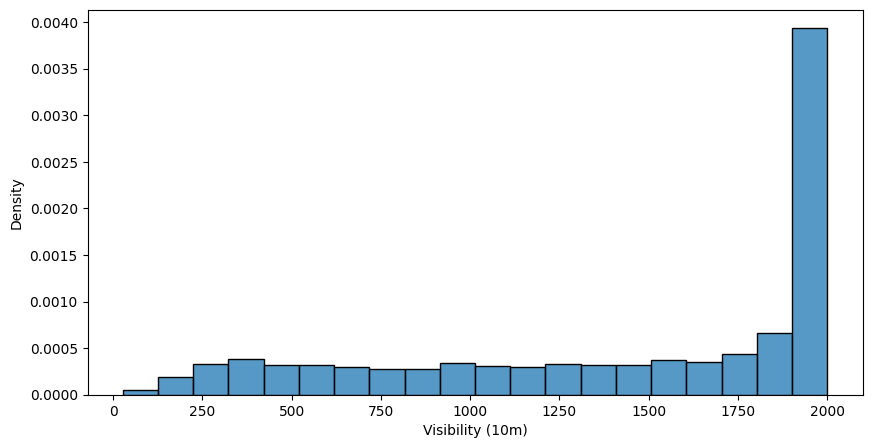

In [97]:
sns.histplot(x= dataset['Visibility (10m)'],stat='density')
plt.show()

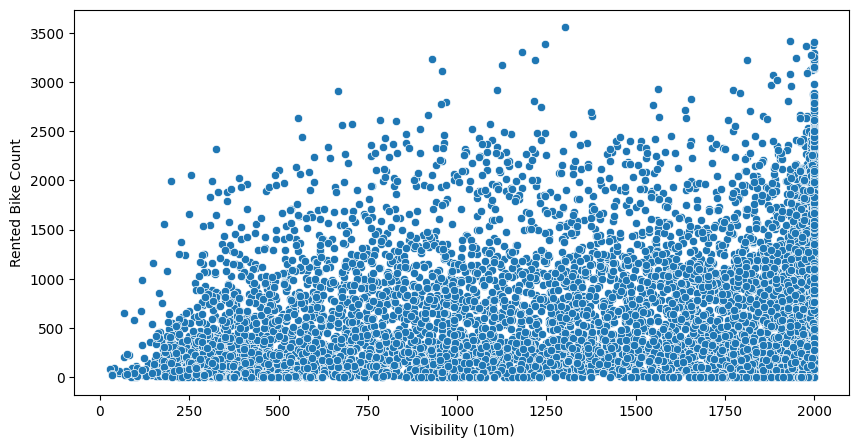

In [98]:
# Chart - 12 visualization code
sns.scatterplot(data = dataset, x = 'Visibility (10m)', y = 'Rented Bike Count')
plt.show()

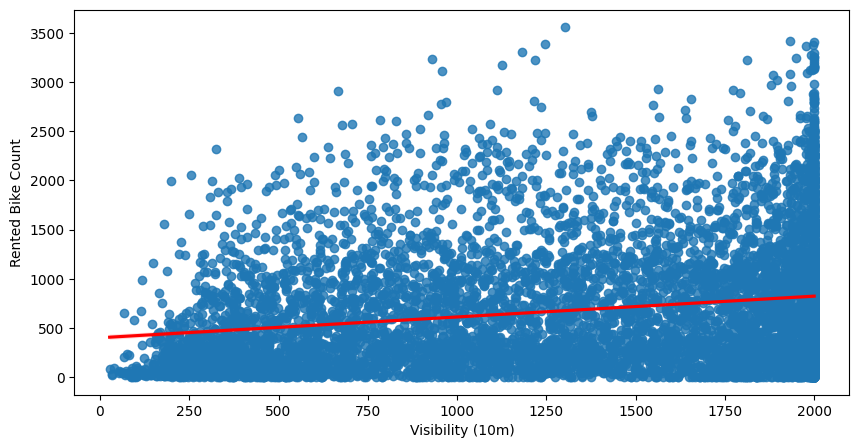

In [99]:
sns.regplot(data = dataset, x = 'Visibility (10m)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [100]:
corr_visibility_demand = dataset['Visibility (10m)'].corr(dataset['Rented Bike Count'])
print(corr_visibility_demand)

0.19928029673135897


##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Visibility is correlated with Demand with the correlation coeficeint of +.2 indicating no significant linear relationship between demand and Visibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No significant relationship between demand and Visibility.

#### Chart - 13 Rented Bike Count with Solar Radiation.

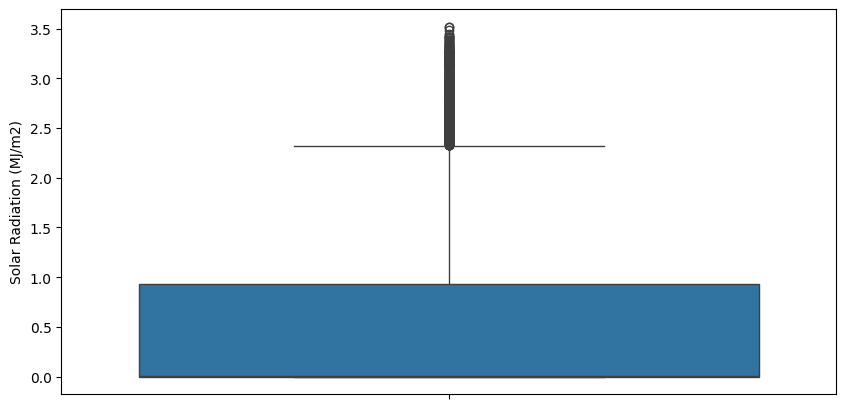

In [101]:
sns.boxplot(dataset['Solar Radiation (MJ/m2)'])
plt.show()

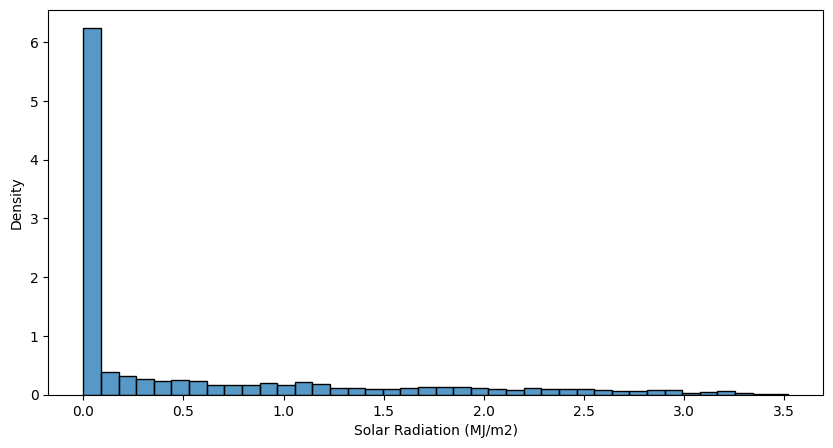

In [102]:
# Chart - 13 visualization code
sns.histplot(x= dataset['Solar Radiation (MJ/m2)'],stat='density')
plt.show()

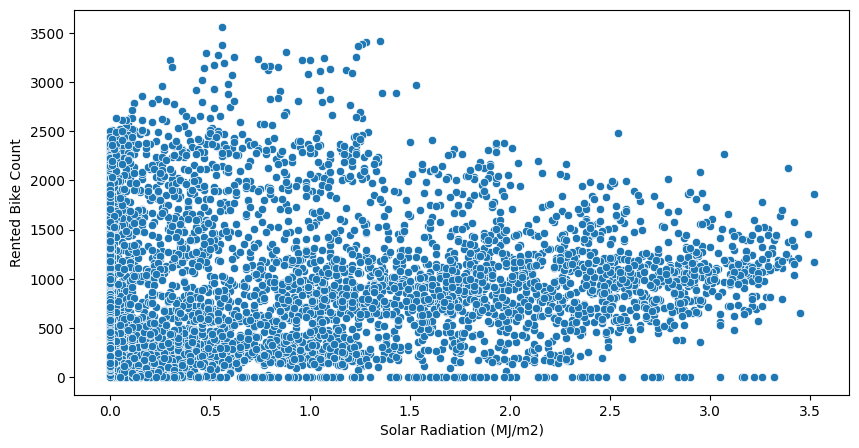

In [103]:
sns.scatterplot(data = dataset, x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count')
plt.show()

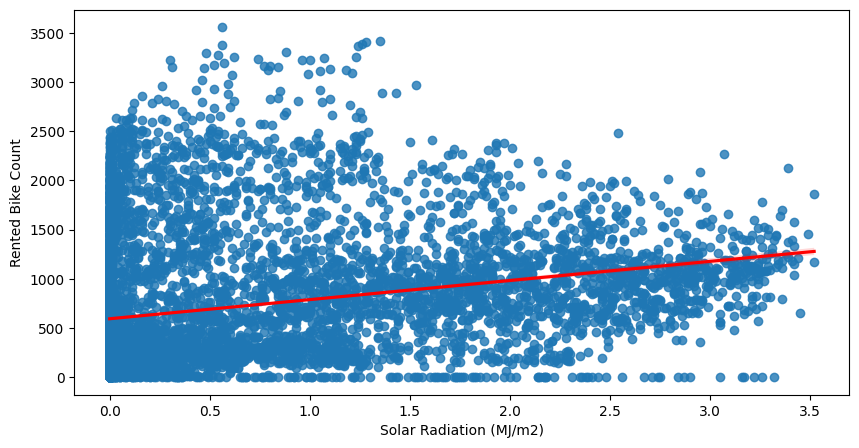

In [104]:
sns.regplot(data = dataset, x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [105]:
corr_radiation_demand = dataset['Solar Radiation (MJ/m2)'].corr(dataset['Rented Bike Count'])
print(corr_radiation_demand)

0.261836985509591


##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Solar Radiation is correlated with Demand with the correlation coeficeint of +.26 indicating weak linear relationship between demand and Solar Radiation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that Solar Radiation is correlated with Demand with the correlation coeficeint of +.26 indicating weak linear relationship between demand and Solar Radiation.

#### Chart - 14 - Correlation Heatmap

In [106]:
cor_dataset = dataset[['Rented Bike Count','Temperature(°C)','Humidity(%)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)']]

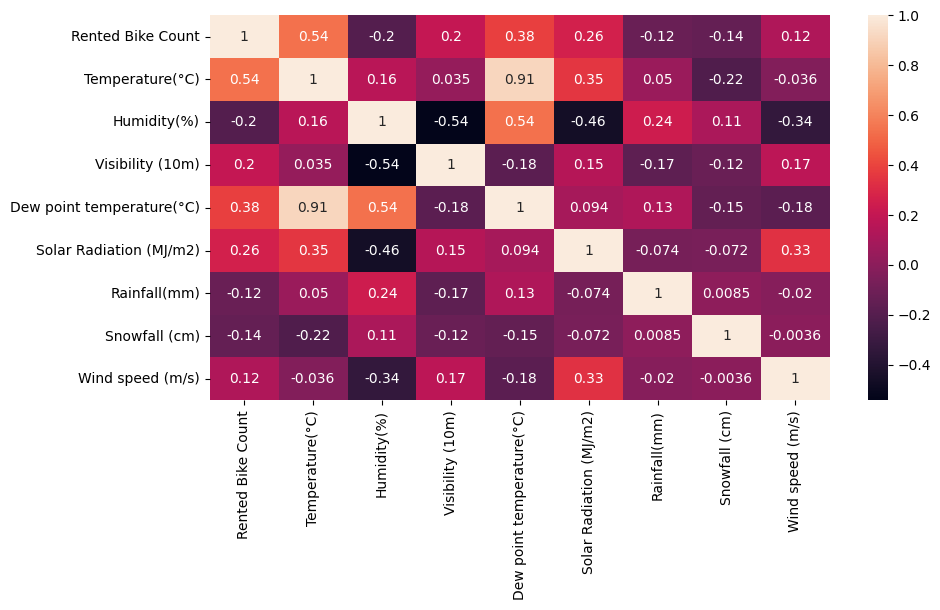

In [107]:
# Correlation Heatmap visualization code
sns.heatmap(data = cor_dataset.corr(),annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap function generates a colour-coded matrix that illustrates how strongly two or more of variables in a dataset correlate with one another.

##### 2. What is/are the insight(s) found from the chart?

From above the above dataset we can see that highest postively correlated feature are Temperature and Dew point temperature with correlation coefficiently of 0.91.

With least Coefficient of correlation i.e -0.02 Rainfall and Wind speed are least co-related features.

#### Chart - 15 - Pair Plot

In [108]:
pairplot_dataset = dataset[['Rented Bike Count','Temperature(°C)','Solar Radiation (MJ/m2)','Snowfall (cm)']]

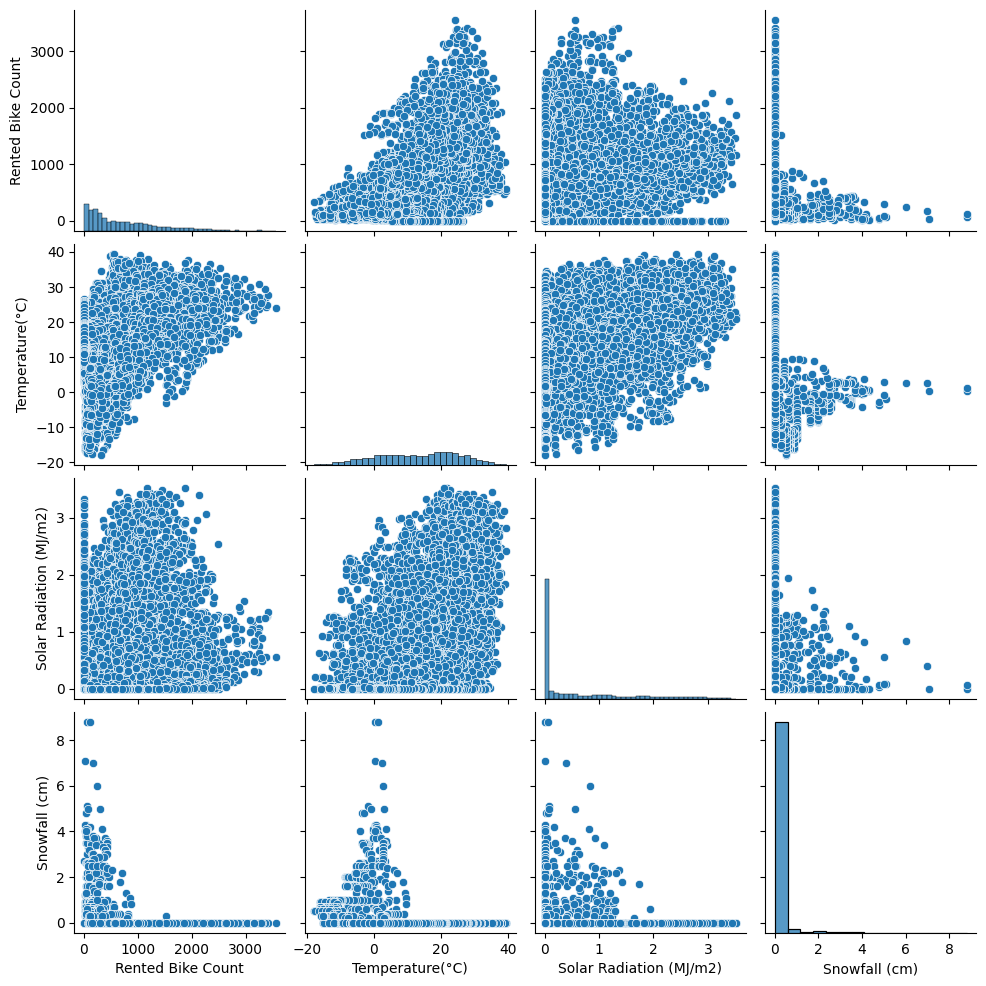

In [109]:
# Pair Plot visualization code
sns.pairplot(data = pairplot_dataset)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two or more variables or to form the most separated clusters

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [110]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Rainfall_cat                 0
Hour_cat                     0
month                        0
day                          0
Weekday/weekend              0
snowfall_cat                 0
dtype: int64

In [111]:
dataset.isnull().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Dataset do not have any missing value

### 2. Handling Outliers

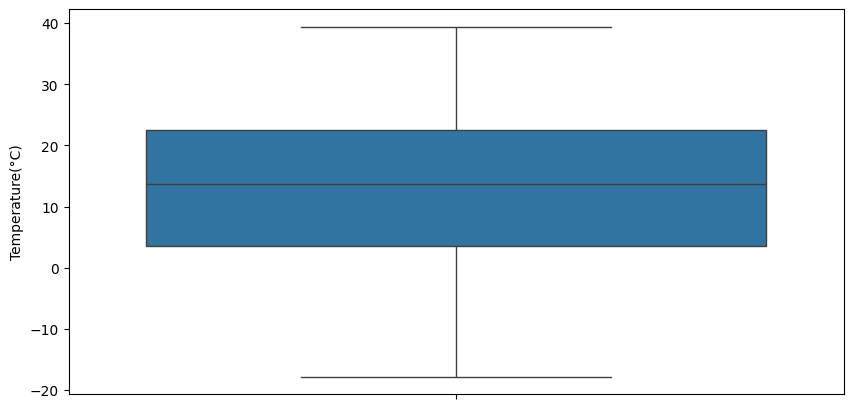

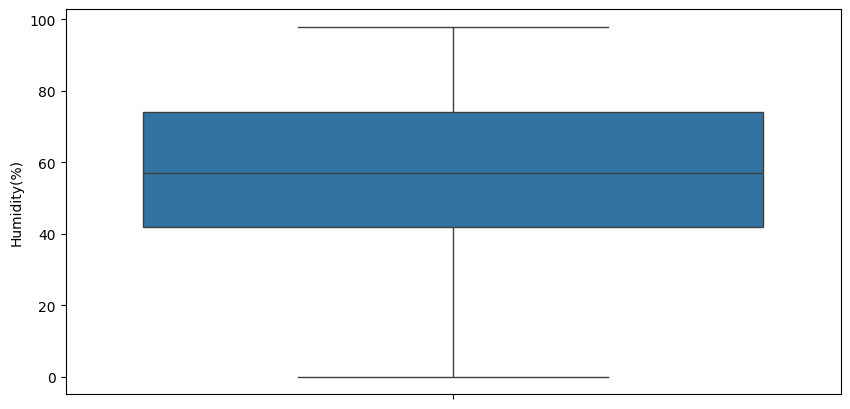

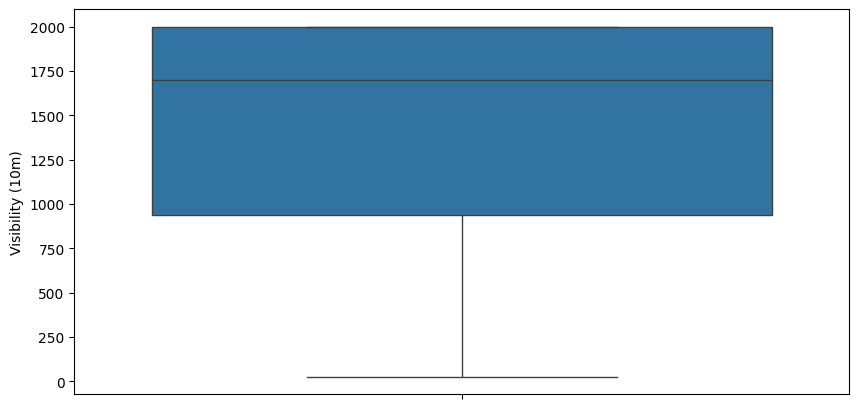

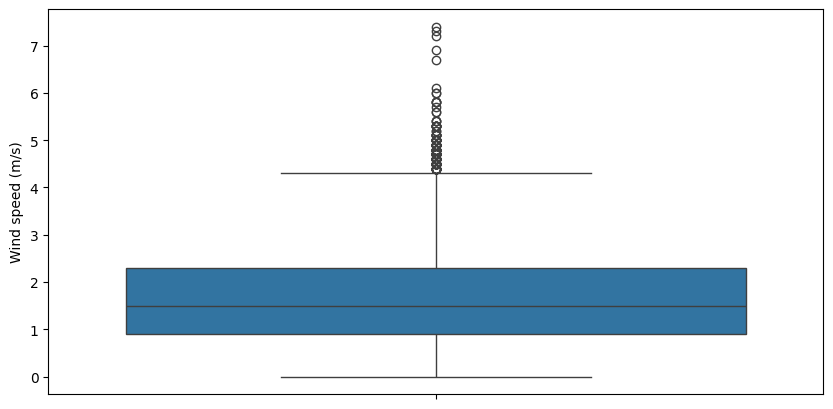

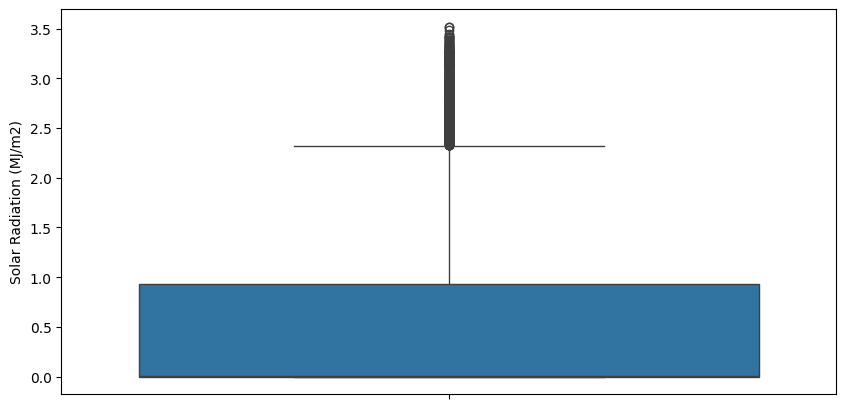

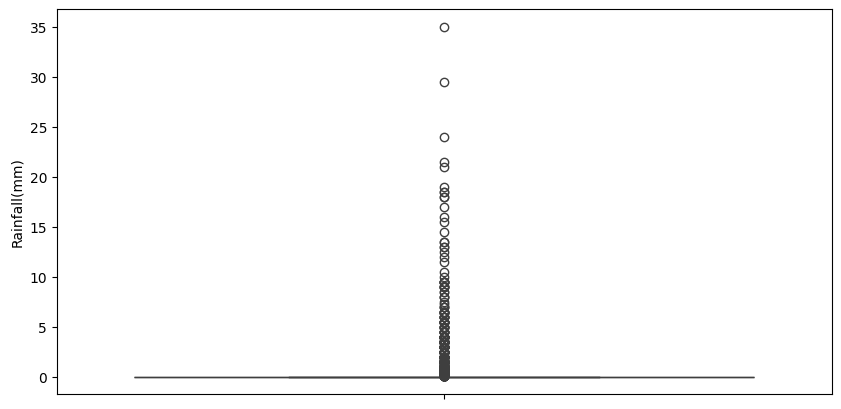

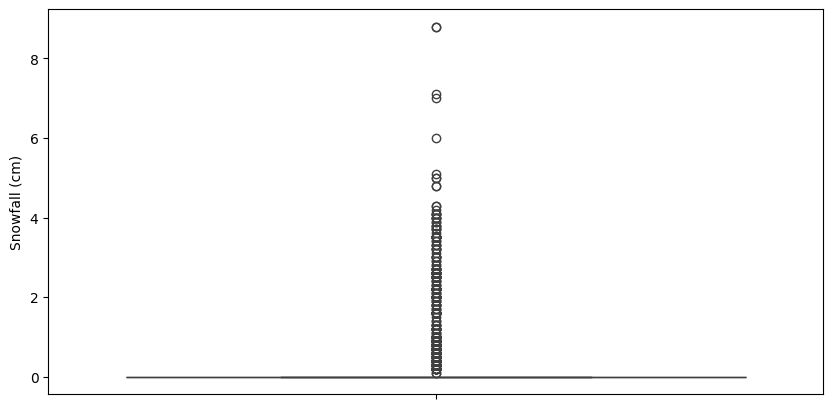

In [112]:
Numerical_columns = ['Temperature(°C)','Humidity(%)','Visibility (10m)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in Numerical_columns:
  sns.boxplot(dataset[col])
  plt.show()

In [113]:
#checking IQR for Rainfall and Windspeed
print('IQR for Rainfall is :',upper_limit(dataset,'Rainfall(mm)'))
print('IQR for Snowfall is :',upper_limit(dataset,'Snowfall (cm)'))
print('IQR for Rainfall and snowfall is 0')

IQR for Rainfall is : 0.0
IQR for Snowfall is : 0.0
IQR for Rainfall and snowfall is 0


In [114]:
#checking maximum values of features based on IQR
print('upper limit or max limit for Wind speed is :',upper_limit(dataset,'Wind speed (m/s)'))
print('upper limit or max limit for Solar Radiation is :',upper_limit(dataset,'Solar Radiation (MJ/m2)'))

upper limit or max limit for Wind speed is : 4.3999999999999995
upper limit or max limit for Solar Radiation is : 2.325


Out of 7 features, 4 features contain outliers.
1. For Rainfall value 99% obseravtion are under 4mm/hr. Therefore setting max limit for rainfall 4mm/hr.
2. For Snowfall value 99% obseravtion are under 2.5mm/hr. Therefore setting max limit for rainfall 2.5mm/hr.
3. For windspeed, Setting the upper limit to be 4.4m/s.
4. For Solar Radiation, Setting the upper limit to be 2.325(MJ/m2).

In [115]:
# Handling Outliers & Outlier treatments
dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].apply(lambda x : 4 if x > 4 else x)
dataset['Snowfall (cm)'] = dataset['Snowfall (cm)'].apply(lambda x : 2.5 if x > 2.5 else x)
dataset['Wind speed (m/s)'] = dataset['Wind speed (m/s)'].apply(lambda x : 4.4 if x > 4.3 else x)
dataset['Solar Radiation (MJ/m2)'] = dataset['Solar Radiation (MJ/m2)'].apply(lambda x : 2.325 if x > 2.325 else x)


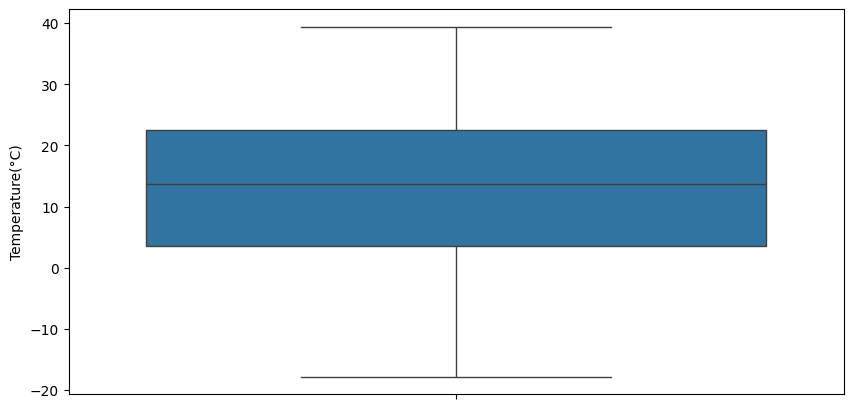

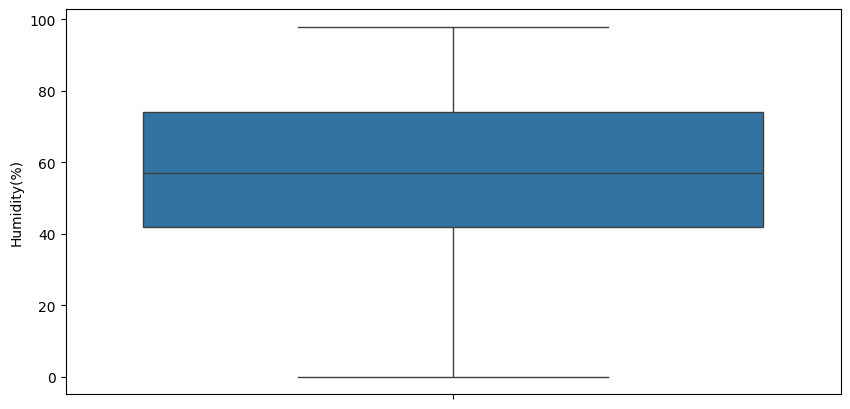

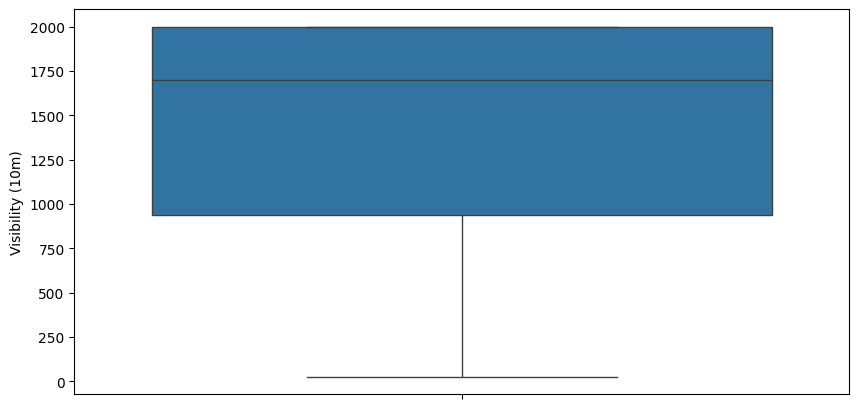

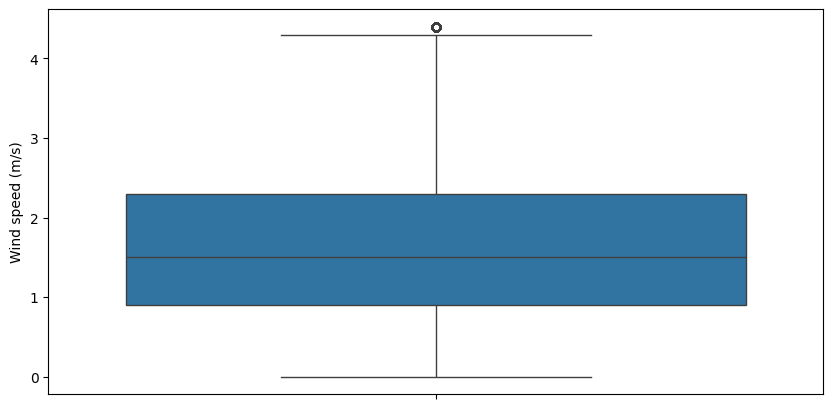

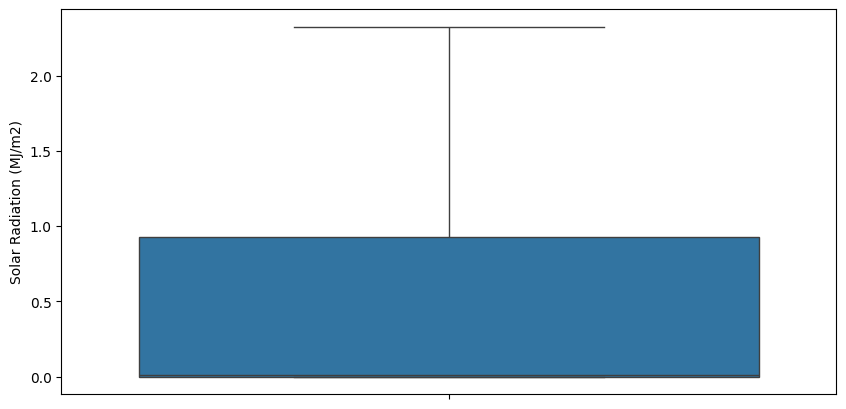

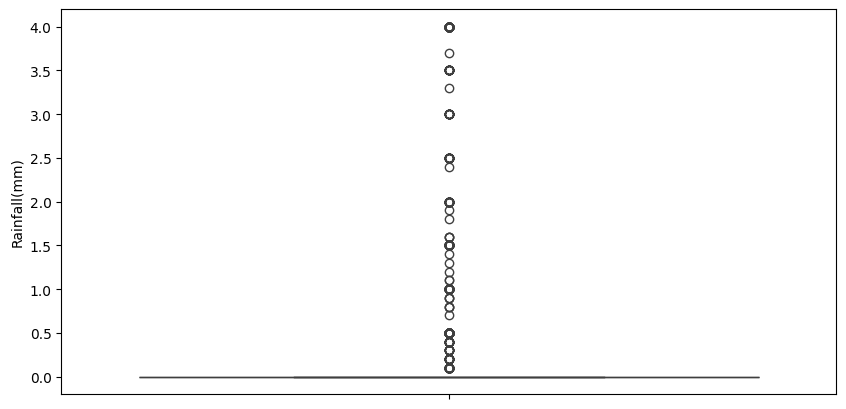

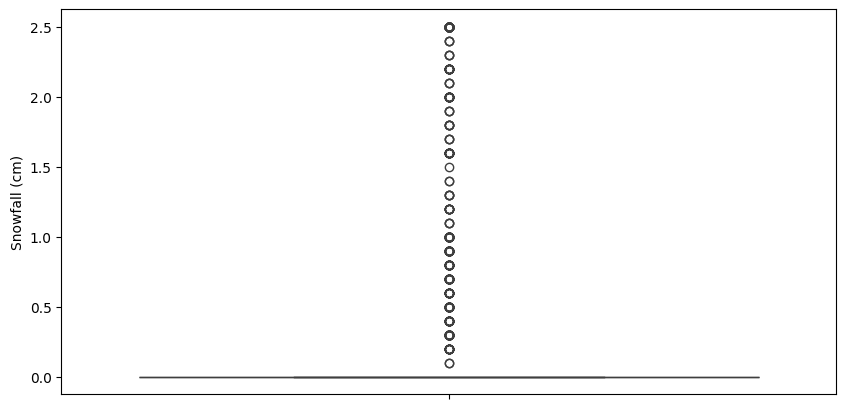

In [116]:
Numerical_columns = ['Temperature(°C)','Humidity(%)','Visibility (10m)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in Numerical_columns:
  sns.boxplot(dataset[col])
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Capping**

In this technique called “outlier detection,” we cap our data to set limits. For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. The number of outliers in the dataset then gives us insight into that capping number. It’s like setting a boundary and saying, “Anything beyond this point is unusual,” and by doing so, we identify and count the outliers in our data.

For example, if you’re working on the income feature, you might find that people above a certain income level behave similarly to those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

Among all the below transformation, Square root transformation is best suited to tranform data into normal distribution.

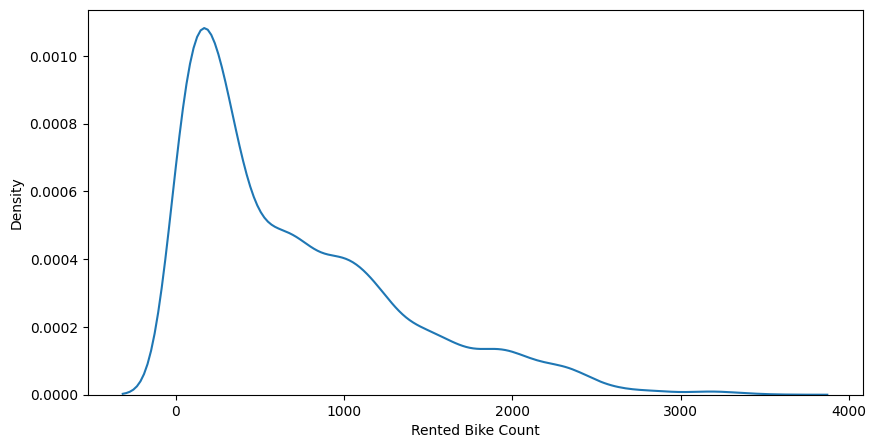

In [117]:
sns.kdeplot(x= dataset['Rented Bike Count'])
plt.show()

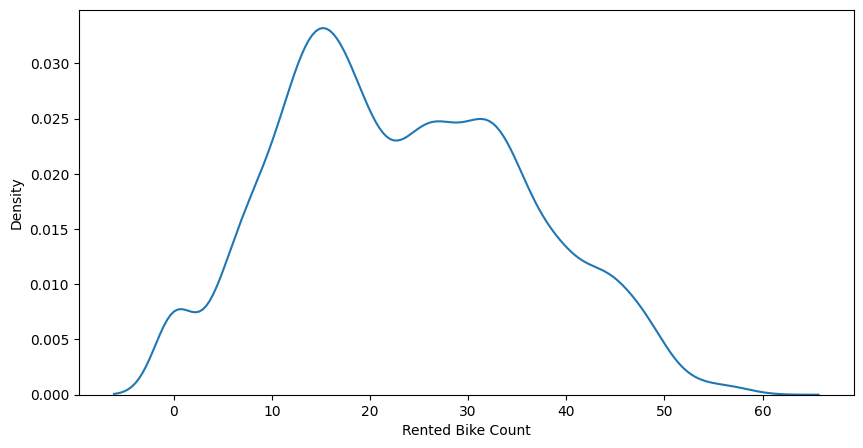

In [118]:
#sqaure root transformation
sns.kdeplot(x= np.sqrt(dataset['Rented Bike Count']))
plt.show()

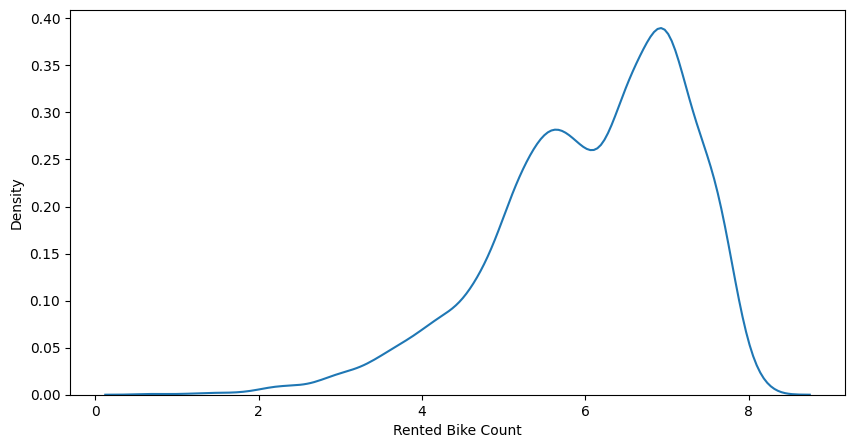

In [119]:
#Log Transformation
sns.kdeplot(x= np.log(dataset['Rented Bike Count']))
plt.show()

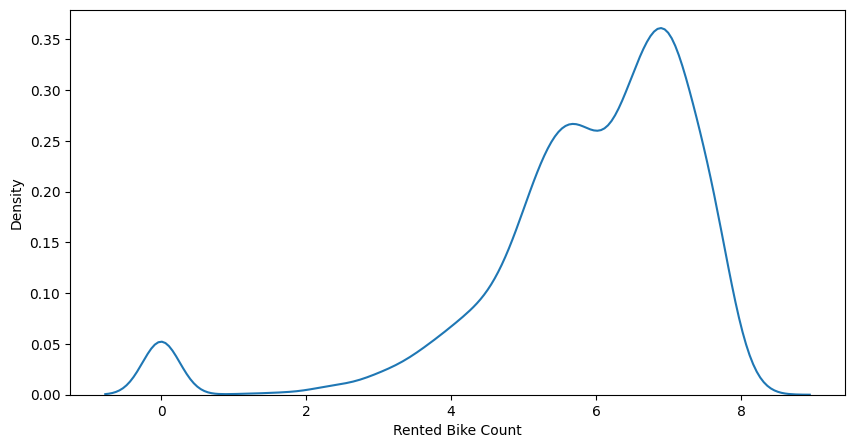

In [120]:
#Log Transformation
sns.kdeplot(x= np.log(dataset['Rented Bike Count']+1))
plt.show()

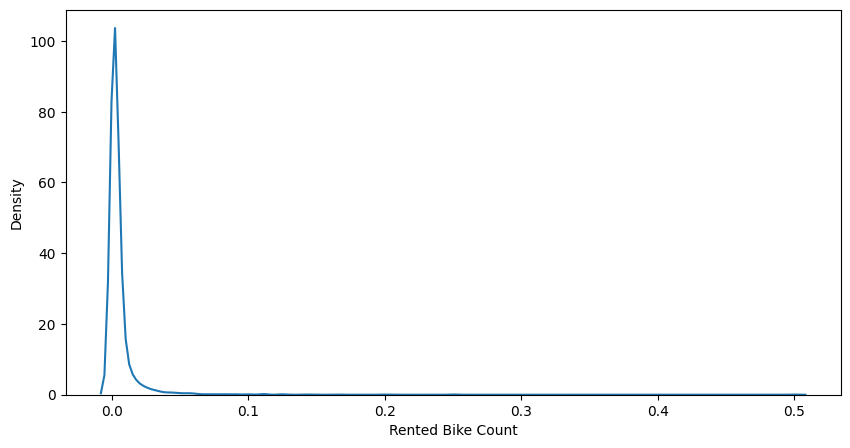

In [121]:
#Inverse Transformation
sns.kdeplot(x= 1/(dataset['Rented Bike Count']))
plt.show()

In [122]:
dataset['Rented Bike Count'] = np.sqrt(dataset['Rented Bike Count'])

Converting data in holiday and functional day, so we can do categorical encoding more effectively.

In [123]:
dataset['Holiday'].replace({0:'No_Holiday',1:'Holiday'},inplace = True)
dataset['Functioning Day'].replace({0:'Not_functional',1:'Functional'},inplace = True)

Changing data types

In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [125]:
categorical_col = ['Holiday','Functioning Day','Weekday/weekend']
for x in categorical_col:
  dataset[x] = dataset[x].astype('category')

#### 2. Feature Selection

In [126]:
# Select your features wisely to avoid overfitting
dataset_fit = dataset[['Rented Bike Count','Hour','Holiday','month','Functioning Day','Weekday/weekend','Rainfall(mm)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Temperature(°C)','Humidity(%)']]

In [127]:
dataset_fit

Rented Bike Count  Hour     Holiday  month Functioning Day  \
0             15.937377     0  No_Holiday     12      Functional   
1             14.282857     1  No_Holiday     12      Functional   
2             13.152946     2  No_Holiday     12      Functional   
3             10.344080     3  No_Holiday     12      Functional   
4              8.831761     4  No_Holiday     12      Functional   
...                 ...   ...         ...    ...             ...   
8755          31.670175    19  No_Holiday     11      Functional   
8756          27.640550    20  No_Holiday     11      Functional   
8757          26.343880    21  No_Holiday     11      Functional   
8758          26.683328    22  No_Holiday     11      Functional   
8759          24.166092    23  No_Holiday     11      Functional   

     Weekday/weekend  Rainfall(mm)  Wind speed (m/s)  Visibility (10m)  \
0            Weekday           0.0               2.2              2000   
1            Weekday           0.0               0.8              2000   
2            Weekday           0.0               1.0              2000   
3            Weekday           0.0               0.9              2000   
4            Weekday           0.0               2.3              2000   
...              ...           ...               ...               ...   
8755         Weekday           0.0               2.6              1894   
8756         Weekday           0.0               2.3              2000   
8757         Weekday           0.0               0.3              1968   
8758         Weekday           0.0               1.0              1859   
8759         Weekday           0.0               1.3              1909   

      Solar Radiation (MJ/m2)  Temperature(°C)  Humidity(%)  
0                         0.0             -5.2           37  
1                         0.0             -5.5           38  
2                         0.0             -6.0           39  
3                         0.0             -6.2           40  
4                         0.0             -6.0           36  
...                       ...              ...          ...  
8755                      0.0              4.2           34  
8756                      0.0              3.4           37  
8757                      0.0              2.6           39  
8758                      0.0              2.1           41  
8759                      0.0              1.9           43  

[8760 rows x 12 columns]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 4. Categorical Encoding

In [128]:
categorical_columns = ['Hour','month','Holiday','Functioning Day','Weekday/weekend']

In [129]:
# Encode your categorical columns
for col in categorical_columns:
    dataset_fit = one_hot_encoding(dataset_fit, col)


In [130]:
dataset_fit.head()

Rented Bike Count  Rainfall(mm)  Wind speed (m/s)  Visibility (10m)  \
0          15.937377           0.0               2.2              2000   
1          14.282857           0.0               0.8              2000   
2          13.152946           0.0               1.0              2000   
3          10.344080           0.0               0.9              2000   
4           8.831761           0.0               2.3              2000   

   Solar Radiation (MJ/m2)  Temperature(°C)  Humidity(%)  Hour_1  Hour_2  \
0                      0.0             -5.2           37       0       0   
1                      0.0             -5.5           38       1       0   
2                      0.0             -6.0           39       0       1   
3                      0.0             -6.2           40       0       0   
4                      0.0             -6.0           36       0       0   

   Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  Hour_11  \
0       0       0       0       0       0       0       0        0        0   
1       0       0       0       0       0       0       0        0        0   
2       0       0       0       0       0       0       0        0        0   
3       1       0       0       0       0       0       0        0        0   
4       0       1       0       0       0       0       0        0        0   

   Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Hour_20  Hour_21  Hour_22  Hour_23  month_2  month_3  month_4  month_5  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         1   
1        0        0        0        0         0         0         1   
2        0        0        0        0         0         0         1   
3        0        0        0        0         0         0         1   
4        0        0        0        0         0         0         1   

   Holiday_No_Holiday  Functioning Day_Not_functional  Weekday/weekend_Weekend  
0                   1                               0                        0  
1                   1                               0                        0  
2                   1                               0                        0  
3                   1                               0                        0  
4                   1                               0                        0

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One Hot Encoding**

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

### 5. Data Scaling

In [131]:
# Scaling your data
dataset_fit

Rented Bike Count  Rainfall(mm)  Wind speed (m/s)  Visibility (10m)  \
0             15.937377           0.0               2.2              2000   
1             14.282857           0.0               0.8              2000   
2             13.152946           0.0               1.0              2000   
3             10.344080           0.0               0.9              2000   
4              8.831761           0.0               2.3              2000   
...                 ...           ...               ...               ...   
8755          31.670175           0.0               2.6              1894   
8756          27.640550           0.0               2.3              2000   
8757          26.343880           0.0               0.3              1968   
8758          26.683328           0.0               1.0              1859   
8759          24.166092           0.0               1.3              1909   

      Solar Radiation (MJ/m2)  Temperature(°C)  Humidity(%)  Hour_1  Hour_2  \
0                         0.0             -5.2           37       0       0   
1                         0.0             -5.5           38       1       0   
2                         0.0             -6.0           39       0       1   
3                         0.0             -6.2           40       0       0   
4                         0.0             -6.0           36       0       0   
...                       ...              ...          ...     ...     ...   
8755                      0.0              4.2           34       0       0   
8756                      0.0              3.4           37       0       0   
8757                      0.0              2.6           39       0       0   
8758                      0.0              2.1           41       0       0   
8759                      0.0              1.9           43       0       0   

      Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  \
0          0       0       0       0       0       0       0        0   
1          0       0       0       0       0       0       0        0   
2          0       0       0       0       0       0       0        0   
3          1       0       0       0       0       0       0        0   
4          0       1       0       0       0       0       0        0   
...      ...     ...     ...     ...     ...     ...     ...      ...   
8755       0       0       0       0       0       0       0        0   
8756       0       0       0       0       0       0       0        0   
8757       0       0       0       0       0       0       0        0   
8758       0       0       0       0       0       0       0        0   
8759       0       0       0       0       0       0       0        0   

      Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8755        0        0        0        0        0        0        0        0   
8756        0        0        0        0        0        0        0        0   
8757        0        0        0        0        0        0        0        0   
8758        0        0        0        0        0        0        0        0   
8759        0        0        0        0        0        0        0        0   

      Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  month_2  month_3  month_4  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0     

##### Which method have you used to scale you data and why?

### 6. Data Splitting

In [132]:
X = dataset_fit.drop(['Rented Bike Count'],axis = 'columns')
X

Rainfall(mm)  Wind speed (m/s)  Visibility (10m)  \
0              0.0               2.2              2000   
1              0.0               0.8              2000   
2              0.0               1.0              2000   
3              0.0               0.9              2000   
4              0.0               2.3              2000   
...            ...               ...               ...   
8755           0.0               2.6              1894   
8756           0.0               2.3              2000   
8757           0.0               0.3              1968   
8758           0.0               1.0              1859   
8759           0.0               1.3              1909   

      Solar Radiation (MJ/m2)  Temperature(°C)  Humidity(%)  Hour_1  Hour_2  \
0                         0.0             -5.2           37       0       0   
1                         0.0             -5.5           38       1       0   
2                         0.0             -6.0           39       0       1   
3                         0.0             -6.2           40       0       0   
4                         0.0             -6.0           36       0       0   
...                       ...              ...          ...     ...     ...   
8755                      0.0              4.2           34       0       0   
8756                      0.0              3.4           37       0       0   
8757                      0.0              2.6           39       0       0   
8758                      0.0              2.1           41       0       0   
8759                      0.0              1.9           43       0       0   

      Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  \
0          0       0       0       0       0       0       0        0   
1          0       0       0       0       0       0       0        0   
2          0       0       0       0       0       0       0        0   
3          1       0       0       0       0       0       0        0   
4          0       1       0       0       0       0       0        0   
...      ...     ...     ...     ...     ...     ...     ...      ...   
8755       0       0       0       0       0       0       0        0   
8756       0       0       0       0       0       0       0        0   
8757       0       0       0       0       0       0       0        0   
8758       0       0       0       0       0       0       0        0   
8759       0       0       0       0       0       0       0        0   

      Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8755        0        0        0        0        0        0        0        0   
8756        0        0        0        0        0        0        0        0   
8757        0        0        0        0        0        0        0        0   
8758        0        0        0        0        0        0        0        0   
8759        0        0        0        0        0        0        0        0   

      Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  month_2  month_3  month_4  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...  

In [133]:
y = dataset_fit['Rented Bike Count']
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

In [134]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 43)
(1752, 43)


##### What data splitting ratio have you used and why?

We used spliting ratio of 0.2.

## ***6. ML Model Implementation***

### ML Model - 1 : Linear Regression

In [173]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [174]:
reg.score(X_train, y_train)

0.7937527867695141

In [175]:
reg.score(X_test, y_test)

0.7961557694110346

In [176]:
reg.coef_

array([-5.14352335e+00, -1.56581948e-02,  8.22903689e-04,  1.06432278e+00,
        4.70594637e-01, -9.86480251e-02, -2.10429652e+00, -4.97182259e+00,
       -7.07360538e+00, -9.63983241e+00, -9.35280411e+00, -4.21668612e+00,
        1.88037100e+00,  7.42936687e+00,  1.55426084e+00, -3.09455008e+00,
       -3.16173259e+00, -2.05619164e+00, -2.38580175e+00, -2.31005225e+00,
       -1.16845700e+00,  6.11365075e-01,  4.39240985e+00,  1.07877991e+01,
        7.20021753e+00,  6.11385126e+00,  6.42045855e+00,  5.16491503e+00,
        1.57262283e+00, -6.48004496e-01,  2.96867881e+00,  4.59322737e+00,
        6.98863114e+00,  8.85035590e+00,  3.03768339e+00,  9.02506783e-01,
        6.24546597e+00,  8.98597338e+00,  7.61907134e+00,  1.99515207e+00,
        3.36084889e+00, -2.84351672e+01, -1.37957963e+00])

In [177]:
reg.intercept_

15.726382453340204

In [178]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [179]:
print(y_pred_train)
print(y_pred_test)

[16.54201217 41.02174638 27.31070468 ... 34.37544435 23.30667037
 22.05899504]
[17.08218599 23.12880194 20.21493296 ... 21.43400773 34.23350061
 27.93323189]


In [180]:
#for train data
#calculating MSE(Mean Square Error)
MSE_Linear_regression = mean_squared_error((y_train), (y_pred_train))
print("Mean Square Error(MSE):",MSE_Linear_regression)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression=np.sqrt(MSE_Linear_regression)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression)

#calculating MAE(Mean absoute error)
MAE_Linear_regression= mean_absolute_error(y_train, y_pred_train)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression)

#calculating r2 and adjusted r2
r2_Linear_regression= r2_score((y_train), (y_pred_train))
print("R2 :",r2_Linear_regression)
Adjusted_R2_Linear_regression = (1-(1-r2_score((y_train), (y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression)

Mean Square Error(MSE): 31.830776456486994
Root Mean Square Error(RMSE) : 5.641877033088101
Mean Absoute Error(MAE) : 4.28716954019294
R2 : 0.7937527867695141
Adjusted R2 : 0.7885603803474351


Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance.

In [181]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_Linear_regression),2),
       'MSE':round((MSE_Linear_regression),2),
       'RMSE':round((RMSE_Linear_regression),2),
       'R2_score':round((r2_Linear_regression),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression),2)
       }

train_df=pd.DataFrame(dict1,index = range(1))

In [182]:
#for test data
#calculating MSE(Mean Square Error)
MSE_Linear_regression_test = mean_squared_error((y_test), (y_pred_test))
print("Mean Square Error(MSE):",MSE_Linear_regression_test)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_test=np.sqrt(MSE_Linear_regression_test)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_test)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_test= mean_absolute_error(y_test, y_pred_test)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_test)

#calculating r2 and adjusted r2
r2_Linear_regression_test= r2_score((y_test), (y_pred_test))
print("R2 :",r2_Linear_regression_test)
Adjusted_R2_Linear_regression_test = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_test)

Mean Square Error(MSE): 32.10266492267047
Root Mean Square Error(RMSE) : 5.665921365733068
Mean Absoute Error(MAE) : 4.307068630162342
R2 : 0.7961557694110346
Adjusted R2 : 0.7910238596245442


The test set's r2_score is 0.79. This means our linear model is performing well on the data

In [183]:
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_Linear_regression_test),2),
       'MSE':round((MSE_Linear_regression_test),2),
       'RMSE':round((RMSE_Linear_regression_test),2),
       'R2_score':round((r2_Linear_regression_test),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_test),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [184]:
#checking all the relevant metrics for Linear Regression.

print(train_df)
print(test_df)

                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.83  5.64      0.79         0.79
                Model   MAE   MSE  RMSE  R2_score  Adjusted R2
1  Linear regression   4.31  32.1  5.67       0.8         0.79


**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

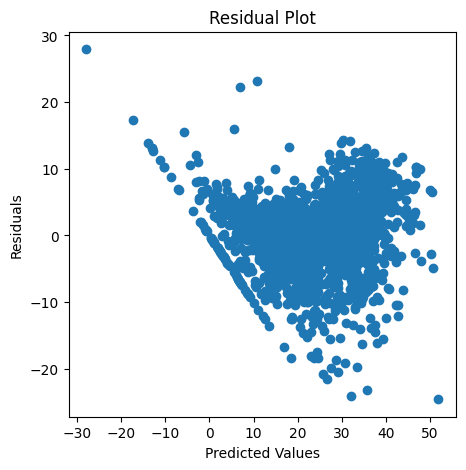

In [185]:
# Heteroscadacity - Residual plot
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### ML Model - 2 : Lasso Regression

1. Ridge and Lasso Regression are types of Regularization techniques.

2. Regularization techniques are used to deal with overfitting and when the dataset is large.

3. Ridge and Lasso Regression involve adding penalties to the regression function



**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [186]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.376989435056968 0.39811010129409585


In [187]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [188]:
#calculate MSE
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)

#calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)


#calculate MAE
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso)


#calculate r2 and adjusted r2
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso)

MSE : 92.89154756100895
RMSE : 9.63802612369405
MAE : 7.316594703451152
R2 : 0.39811010129409585
Adjusted R2 : 0.3829571354601651


Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance

In [189]:
# storing the test set metrics value in a dataframe for later comparison
dict3={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),2),
       'MSE':round((MSE_lasso),2),
       'RMSE':round((RMSE_lasso),2),
       'R2_score':round((r2_lasso),2),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
train_df=train_df.append(dict3,ignore_index=True)

In [190]:
#calculate MSE
MSE_lasso= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_lasso)

#calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)


#calculate MAE
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lasso= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso)

MSE : 98.11560205487834
RMSE : 9.905332001244497
MAE : 7.506218311575109
R2 : 0.376989435056968
Adjusted R2 : 0.3613047428482149


In [191]:
# storing the test set metrics value in a dataframe for later comparison
dict4={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso),2),
       }
test_df=test_df.append(dict4,ignore_index=True)

In [192]:
#checking all the relevant metrics for Lasso Regression.

print(train_df)
print(test_df)

                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.83  5.64      0.79         0.79
1   Lasso regression   7.32  92.89  9.64      0.40         0.38
                Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   4.310  32.100  5.670     0.800         0.79
1   Lasso regression   7.506  98.116  9.905     0.377         0.36


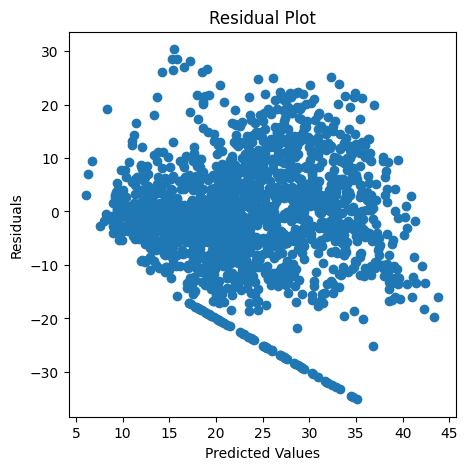

In [193]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***